In [2]:
from MMI_solver import MMI, create_ridge,create_ridge2,create_taper,create_2D_sim,approximate_material,create_3D_MMI_simulation
import gplugins.tidy3d.materials as mat
import numpy as np
import tidy3d as td
import matplotlib.pyplot as plt
import tidy3d.web as web
from scipy.optimize import minimize
from functools import partial




/Users/daniel/Desktop/gfp-cspdk.si220-main/scripts/TFM/Master-Thesis/.venv/lib/python3.12/site-packages/skfem/assembly/form/linear_form.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  data[ixs] = self._kernel(vbasis.basis[i], w, dx)
/Users/daniel/Desktop/gfp-cspdk.si220-main/scripts/TFM/Master-Thesis/.venv/lib/python3.12/site-packages/skfem/assembly/form/linear_form.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  data[ixs] = self._kernel(vbasis.basis[i], w, dx)


[-7.         -6.98631476 -6.97262952 ...  6.97262952  6.98631476
  7.        ]


/Users/daniel/Desktop/gfp-cspdk.si220-main/scripts/TFM/Master-Thesis/.venv/lib/python3.12/site-packages/skfem/assembly/form/linear_form.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  data[ixs] = self._kernel(vbasis.basis[i], w, dx)


  0%|          | 0/1000 [00:00<?, ?it/s]

ratio_out [0.47449868+0.j 0.52550132+0.j]
excess_loss (0.3455460181505085+0j)
Lpi_TE 62.224741625920664


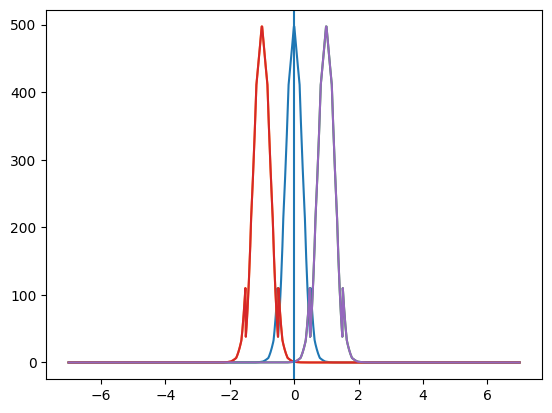

In [2]:
Len_MMI = 59.92/2 #longitud del MMI
wvl = 1.55 #longitud de onda
mat_core = mat.sin(1.55) #material del core
mat_clad = mat.sio2(1.55) #material del clad
input_number = 2 #número de waveguides de entrada
output_number = 2 #número de waveguides de salida
input_positions = [-1/6,1/6] #posiciones de las waveguides de entrada
output_positions = [-1/6,1/6] #la maxima posicion es [-1/2,1/2]
wg_array_width=1.00 #anchura de la waveguide de entrada/salida
wg_array_thickness=0.8 #altura de la waveguide de entrada/salida, es igual que la del MMI
MMI_width=6.0 #anchura del MMI
MMI_num_modes=20#número de modos del MMI a calcular
slices=1024
gap1 = (input_positions[1]-input_positions[0]) * MMI_width - wg_array_width #distancia entre waveguides de entrada/salida

gap = (input_positions[1]-input_positions[0]) * MMI_width #distancia entre waveguides de entrada/salida
ratio_out ,excess_loss, L_v, intensidad_L, Lpi_TE, Lpi_TM = MMI(
    Len_MMI, #longitud del MMI
    wvl , #longitud de onda
    mat_core, #material del core
    mat_clad, #material del clad
    input_number, #número de waveguides de entrada
    output_number, #número de waveguides de salida
    input_positions, #posiciones de las waveguides de entrada
    output_positions, #la maxima posicion es [-1/2,1/2]
    wg_array_width, #anchura de la waveguide de entrada/salida
    wg_array_thickness, #altura de la waveguide de entrada/salida, es igual que la del MMI
    MMI_width, #anchura del MMI
    MMI_num_modes, #número de modos del MMI a calcular
    slices,
    gap1  #distancia entre waveguides de entrada/salida
)
print('ratio_out', ratio_out)
print('excess_loss', excess_loss)
print('Lpi_TE', Lpi_TE)


In [3]:
punto_exp = 47 #punto de la longitud del MMI a calcular, 0 es el mínimo y 99 es el máximo
#ahora empezaremos con la parte de tidy3d
Len_MMI_ = np.linspace(Lpi_TE/100,Lpi_TE,100) #longitud del MMI
Len_MMI = Len_MMI_[punto_exp] #longitud del MMI
#en primer lugar, definimos los materiales
#sin = td.material_library['cSi']['Li1993_293K'] #cristaline silicon
sin = td.material_library['SiN']['Horiba']  # 
sio2 = td.material_library['SiO2']['Horiba']
#sin = mat_core
#sio2 = mat_clad
wvlenth = np.linspace(1.5,1.6,101)
freqs = td.C_0 / wvlenth
fwidth = 0.5 * (np.max(freqs) - np.min(freqs))
freq0 = td.C_0 / 1.55
wvg_length = 1000
taper_length = 5.0
len_corner = taper_length

balance_weight,loss_weight = 0.5, 0.5

NameError: name 'Lpi_TE' is not defined

In [4]:
def objective(L_array):
    L = L_array[0]
    return create_3D_MMI_simulation(L,MMI_width, wg_array_thickness, wg_array_width,wvg_length, gap, taper_length, freq0, fwidth, sin, sio2,freqs,len_corner,balance_weight,loss_weight)

a = objective([Len_MMI])

13:47:59 CEST WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

13:48:00 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-b8d448ec-963c-4296-95be-a4a8660d166f' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=8376;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b8d448ec-963c-4296-95be-a4a8660d166f\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=459126;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b8d448ec-963c-4296-95be-a4a8660d166f\taskId]8;;\]8;id=8376;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b8d448ec-963c-4296-95be-a4a8660d166f\=]8;;\]8;id=980530;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b8d448ec-963c-4296-95be-a4a8660d166f\fdve]8;;\]8;id=8376;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b8d448ec-963c-4296-95be-a4a8660d166f\-b8d448ec-96]8;;\
              ]8;id=8376;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b8d448ec-963c-4296-95be-a4a8660d166f\3c-4296-95be-a4a8660d166f']8;;\.

              Task folder: ]8;id=548910;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:48:02 CEST Maximum FlexCredit cost: 0.157. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:48:03 CEST status = success

Output()

13:48:07 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

In [5]:
bounds = [(Len_MMI - Len_MMI/2,Len_MMI + Len_MMI/2)]
Len_MMI = Len_MMI
res = minimize(objective, [Len_MMI], bounds=bounds, method='nelder-mead')

Len_MMI2 = res.x[0]
print(f"Longitud óptima: {res.x[0]:.3f} nm")
print(f"Diferencia minima: {res.fun:.4f}")

print(Len_MMI_[punto_exp])

13:48:14 CEST WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-3f2c275f-d06a-4957-893e-639661ae7833' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=203320;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3f2c275f-d06a-4957-893e-639661ae7833\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=337984;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3f2c275f-d06a-4957-893e-639661ae7833\taskId]8;;\]8;id=203320;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3f2c275f-d06a-4957-893e-639661ae7833\=]8;;\]8;id=516768;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3f2c275f-d06a-4957-893e-639661ae7833\fdve]8;;\]8;id=203320;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3f2c275f-d06a-4957-893e-639661ae7833\-3f2c275f-d0]8;;\
              ]8;id=203320;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3f2c275f-d06a-4957-893e-639661ae7833\6a-4957-893e-639661ae7833']8;;\.

              Task folder: ]8;id=155531;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:48:16 CEST Maximum FlexCredit cost: 0.157. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:48:17 CEST status = success

Output()

13:48:20 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-fb22279b-b251-42e3-8bb6-9b4052342ddf' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=256390;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fb22279b-b251-42e3-8bb6-9b4052342ddf\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=709829;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fb22279b-b251-42e3-8bb6-9b4052342ddf\taskId]8;;\]8;id=256390;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fb22279b-b251-42e3-8bb6-9b4052342ddf\=]8;;\]8;id=145391;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fb22279b-b251-42e3-8bb6-9b4052342ddf\fdve]8;;\]8;id=256390;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fb22279b-b251-42e3-8bb6-9b4052342ddf\-fb22279b-b2]8;;\
              ]8;id=256390;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fb22279b-b251-42e3-8bb6-9b4052342ddf\51-42e3-8bb6-9b4052342ddf']8;;\.

              Task folder: ]8;id=767588;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:48:22 CEST Maximum FlexCredit cost: 0.164. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:48:23 CEST status = success

Output()

13:48:26 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-d6ddf953-1a04-4915-9390-641d49917d0a' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=633830;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d6ddf953-1a04-4915-9390-641d49917d0a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=812397;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d6ddf953-1a04-4915-9390-641d49917d0a\taskId]8;;\]8;id=633830;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d6ddf953-1a04-4915-9390-641d49917d0a\=]8;;\]8;id=177978;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d6ddf953-1a04-4915-9390-641d49917d0a\fdve]8;;\]8;id=633830;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d6ddf953-1a04-4915-9390-641d49917d0a\-d6ddf953-1a]8;;\
              ]8;id=633830;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d6ddf953-1a04-4915-9390-641d49917d0a\04-4915-9390-641d49917d0a']8;;\.

              Task folder: ]8;id=960135;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:48:28 CEST Maximum FlexCredit cost: 0.151. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:48:29 CEST status = success

Output()

13:48:32 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-85db1505-7c6d-4456-95c8-d609e39a6fb9' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=875734;https://tidy3d.simulation.cloud/workbench?taskId=fdve-85db1505-7c6d-4456-95c8-d609e39a6fb9\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=294760;https://tidy3d.simulation.cloud/workbench?taskId=fdve-85db1505-7c6d-4456-95c8-d609e39a6fb9\taskId]8;;\]8;id=875734;https://tidy3d.simulation.cloud/workbench?taskId=fdve-85db1505-7c6d-4456-95c8-d609e39a6fb9\=]8;;\]8;id=328031;https://tidy3d.simulation.cloud/workbench?taskId=fdve-85db1505-7c6d-4456-95c8-d609e39a6fb9\fdve]8;;\]8;id=875734;https://tidy3d.simulation.cloud/workbench?taskId=fdve-85db1505-7c6d-4456-95c8-d609e39a6fb9\-85db1505-7c]8;;\
              ]8;id=875734;https://tidy3d.simulation.cloud/workbench?taskId=fdve-85db1505-7c6d-4456-95c8-d609e39a6fb9\6d-4456-95c8-d609e39a6fb9']8;;\.

              Task folder: ]8;id=884164;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:48:34 CEST Maximum FlexCredit cost: 0.144. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:48:35 CEST status = success

Output()

13:48:38 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-154f71ed-fba4-4e13-a8a2-a38b54149a54' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=693186;https://tidy3d.simulation.cloud/workbench?taskId=fdve-154f71ed-fba4-4e13-a8a2-a38b54149a54\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=98039;https://tidy3d.simulation.cloud/workbench?taskId=fdve-154f71ed-fba4-4e13-a8a2-a38b54149a54\taskId]8;;\]8;id=693186;https://tidy3d.simulation.cloud/workbench?taskId=fdve-154f71ed-fba4-4e13-a8a2-a38b54149a54\=]8;;\]8;id=301840;https://tidy3d.simulation.cloud/workbench?taskId=fdve-154f71ed-fba4-4e13-a8a2-a38b54149a54\fdve]8;;\]8;id=693186;https://tidy3d.simulation.cloud/workbench?taskId=fdve-154f71ed-fba4-4e13-a8a2-a38b54149a54\-154f71ed-fb]8;;\
              ]8;id=693186;https://tidy3d.simulation.cloud/workbench?taskId=fdve-154f71ed-fba4-4e13-a8a2-a38b54149a54\a4-4e13-a8a2-a38b54149a54']8;;\.

              Task folder: ]8;id=922469;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:48:40 CEST Maximum FlexCredit cost: 0.131. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:48:41 CEST status = success

Output()

13:48:44 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-ce5c5d32-ba16-4aed-9705-f6b9db24ba78' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=644376;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ce5c5d32-ba16-4aed-9705-f6b9db24ba78\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=725886;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ce5c5d32-ba16-4aed-9705-f6b9db24ba78\taskId]8;;\]8;id=644376;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ce5c5d32-ba16-4aed-9705-f6b9db24ba78\=]8;;\]8;id=29995;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ce5c5d32-ba16-4aed-9705-f6b9db24ba78\fdve]8;;\]8;id=644376;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ce5c5d32-ba16-4aed-9705-f6b9db24ba78\-ce5c5d32-ba]8;;\
              ]8;id=644376;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ce5c5d32-ba16-4aed-9705-f6b9db24ba78\16-4aed-9705-f6b9db24ba78']8;;\.

              Task folder: ]8;id=127804;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:48:46 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:48:47 CEST status = success

Output()

13:48:50 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-15c6fd07-c060-4909-a34d-8e7e4ccc2a95' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=34584;https://tidy3d.simulation.cloud/workbench?taskId=fdve-15c6fd07-c060-4909-a34d-8e7e4ccc2a95\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=289883;https://tidy3d.simulation.cloud/workbench?taskId=fdve-15c6fd07-c060-4909-a34d-8e7e4ccc2a95\taskId]8;;\]8;id=34584;https://tidy3d.simulation.cloud/workbench?taskId=fdve-15c6fd07-c060-4909-a34d-8e7e4ccc2a95\=]8;;\]8;id=813514;https://tidy3d.simulation.cloud/workbench?taskId=fdve-15c6fd07-c060-4909-a34d-8e7e4ccc2a95\fdve]8;;\]8;id=34584;https://tidy3d.simulation.cloud/workbench?taskId=fdve-15c6fd07-c060-4909-a34d-8e7e4ccc2a95\-15c6fd07-c0]8;;\
              ]8;id=34584;https://tidy3d.simulation.cloud/workbench?taskId=fdve-15c6fd07-c060-4909-a34d-8e7e4ccc2a95\60-4909-a34d-8e7e4ccc2a95']8;;\.

              Task folder: ]8;id=214905;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:48:52 CEST Maximum FlexCredit cost: 0.131. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:48:53 CEST status = success

Output()

13:48:56 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-730a88db-5079-4435-b57c-91231abceb07' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=166424;https://tidy3d.simulation.cloud/workbench?taskId=fdve-730a88db-5079-4435-b57c-91231abceb07\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=453819;https://tidy3d.simulation.cloud/workbench?taskId=fdve-730a88db-5079-4435-b57c-91231abceb07\taskId]8;;\]8;id=166424;https://tidy3d.simulation.cloud/workbench?taskId=fdve-730a88db-5079-4435-b57c-91231abceb07\=]8;;\]8;id=20729;https://tidy3d.simulation.cloud/workbench?taskId=fdve-730a88db-5079-4435-b57c-91231abceb07\fdve]8;;\]8;id=166424;https://tidy3d.simulation.cloud/workbench?taskId=fdve-730a88db-5079-4435-b57c-91231abceb07\-730a88db-50]8;;\
              ]8;id=166424;https://tidy3d.simulation.cloud/workbench?taskId=fdve-730a88db-5079-4435-b57c-91231abceb07\79-4435-b57c-91231abceb07']8;;\.

              Task folder: ]8;id=653398;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:48:58 CEST Maximum FlexCredit cost: 0.141. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:48:59 CEST status = success

Output()

13:49:03 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-924e83a3-c3f5-4e3f-ba72-bcaccbbb55cb' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=476535;https://tidy3d.simulation.cloud/workbench?taskId=fdve-924e83a3-c3f5-4e3f-ba72-bcaccbbb55cb\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=110130;https://tidy3d.simulation.cloud/workbench?taskId=fdve-924e83a3-c3f5-4e3f-ba72-bcaccbbb55cb\taskId]8;;\]8;id=476535;https://tidy3d.simulation.cloud/workbench?taskId=fdve-924e83a3-c3f5-4e3f-ba72-bcaccbbb55cb\=]8;;\]8;id=360261;https://tidy3d.simulation.cloud/workbench?taskId=fdve-924e83a3-c3f5-4e3f-ba72-bcaccbbb55cb\fdve]8;;\]8;id=476535;https://tidy3d.simulation.cloud/workbench?taskId=fdve-924e83a3-c3f5-4e3f-ba72-bcaccbbb55cb\-924e83a3-c3]8;;\
              ]8;id=476535;https://tidy3d.simulation.cloud/workbench?taskId=fdve-924e83a3-c3f5-4e3f-ba72-bcaccbbb55cb\f5-4e3f-ba72-bcaccbbb55cb']8;;\.

              Task folder: ]8;id=762695;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:49:05 CEST Maximum FlexCredit cost: 0.135. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:49:06 CEST status = success

Output()

13:49:09 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-544e69e4-c904-48c3-8a03-4370e5e9d0fe' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=573732;https://tidy3d.simulation.cloud/workbench?taskId=fdve-544e69e4-c904-48c3-8a03-4370e5e9d0fe\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=778502;https://tidy3d.simulation.cloud/workbench?taskId=fdve-544e69e4-c904-48c3-8a03-4370e5e9d0fe\taskId]8;;\]8;id=573732;https://tidy3d.simulation.cloud/workbench?taskId=fdve-544e69e4-c904-48c3-8a03-4370e5e9d0fe\=]8;;\]8;id=865401;https://tidy3d.simulation.cloud/workbench?taskId=fdve-544e69e4-c904-48c3-8a03-4370e5e9d0fe\fdve]8;;\]8;id=573732;https://tidy3d.simulation.cloud/workbench?taskId=fdve-544e69e4-c904-48c3-8a03-4370e5e9d0fe\-544e69e4-c9]8;;\
              ]8;id=573732;https://tidy3d.simulation.cloud/workbench?taskId=fdve-544e69e4-c904-48c3-8a03-4370e5e9d0fe\04-48c3-8a03-4370e5e9d0fe']8;;\.

              Task folder: ]8;id=851442;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:49:11 CEST Maximum FlexCredit cost: 0.140. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:49:12 CEST status = success

Output()

13:49:15 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-c56ec39c-d8a5-48d7-8db1-302e2d47868e' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=109119;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c56ec39c-d8a5-48d7-8db1-302e2d47868e\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=662137;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c56ec39c-d8a5-48d7-8db1-302e2d47868e\taskId]8;;\]8;id=109119;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c56ec39c-d8a5-48d7-8db1-302e2d47868e\=]8;;\]8;id=317974;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c56ec39c-d8a5-48d7-8db1-302e2d47868e\fdve]8;;\]8;id=109119;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c56ec39c-d8a5-48d7-8db1-302e2d47868e\-c56ec39c-d8]8;;\
              ]8;id=109119;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c56ec39c-d8a5-48d7-8db1-302e2d47868e\a5-48d7-8db1-302e2d47868e']8;;\.

              Task folder: ]8;id=476202;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:49:17 CEST Maximum FlexCredit cost: 0.136. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:49:18 CEST status = success

Output()

13:49:21 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-b424e887-61d7-4249-a62e-8f5329908d01' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=532231;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b424e887-61d7-4249-a62e-8f5329908d01\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=862379;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b424e887-61d7-4249-a62e-8f5329908d01\taskId]8;;\]8;id=532231;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b424e887-61d7-4249-a62e-8f5329908d01\=]8;;\]8;id=690930;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b424e887-61d7-4249-a62e-8f5329908d01\fdve]8;;\]8;id=532231;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b424e887-61d7-4249-a62e-8f5329908d01\-b424e887-61]8;;\
              ]8;id=532231;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b424e887-61d7-4249-a62e-8f5329908d01\d7-4249-a62e-8f5329908d01']8;;\.

              Task folder: ]8;id=570303;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:49:23 CEST Maximum FlexCredit cost: 0.139. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:49:24 CEST status = success

Output()

13:49:27 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-a2c8755f-6cdb-4683-ad85-9de98e97e997' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=885154;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a2c8755f-6cdb-4683-ad85-9de98e97e997\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=127375;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a2c8755f-6cdb-4683-ad85-9de98e97e997\taskId]8;;\]8;id=885154;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a2c8755f-6cdb-4683-ad85-9de98e97e997\=]8;;\]8;id=810866;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a2c8755f-6cdb-4683-ad85-9de98e97e997\fdve]8;;\]8;id=885154;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a2c8755f-6cdb-4683-ad85-9de98e97e997\-a2c8755f-6c]8;;\
              ]8;id=885154;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a2c8755f-6cdb-4683-ad85-9de98e97e997\db-4683-ad85-9de98e97e997']8;;\.

              Task folder: ]8;id=278977;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:49:29 CEST Maximum FlexCredit cost: 0.137. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:49:30 CEST status = success

Output()

13:49:33 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

13:49:34 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-099772bf-55cc-4b15-b970-c39091208d75' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=273811;https://tidy3d.simulation.cloud/workbench?taskId=fdve-099772bf-55cc-4b15-b970-c39091208d75\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=41688;https://tidy3d.simulation.cloud/workbench?taskId=fdve-099772bf-55cc-4b15-b970-c39091208d75\taskId]8;;\]8;id=273811;https://tidy3d.simulation.cloud/workbench?taskId=fdve-099772bf-55cc-4b15-b970-c39091208d75\=]8;;\]8;id=367293;https://tidy3d.simulation.cloud/workbench?taskId=fdve-099772bf-55cc-4b15-b970-c39091208d75\fdve]8;;\]8;id=273811;https://tidy3d.simulation.cloud/workbench?taskId=fdve-099772bf-55cc-4b15-b970-c39091208d75\-099772bf-55]8;;\
              ]8;id=273811;https://tidy3d.simulation.cloud/workbench?taskId=fdve-099772bf-55cc-4b15-b970-c39091208d75\cc-4b15-b970-c39091208d75']8;;\.

              Task folder: ]8;id=540732;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:49:36 CEST Maximum FlexCredit cost: 0.139. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

              status = success

Output()

13:49:40 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-bc3e828c-9671-4dd4-a784-16964388a915' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=316362;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bc3e828c-9671-4dd4-a784-16964388a915\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=848170;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bc3e828c-9671-4dd4-a784-16964388a915\taskId]8;;\]8;id=316362;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bc3e828c-9671-4dd4-a784-16964388a915\=]8;;\]8;id=907927;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bc3e828c-9671-4dd4-a784-16964388a915\fdve]8;;\]8;id=316362;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bc3e828c-9671-4dd4-a784-16964388a915\-bc3e828c-96]8;;\
              ]8;id=316362;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bc3e828c-9671-4dd4-a784-16964388a915\71-4dd4-a784-16964388a915']8;;\.

              Task folder: ]8;id=324569;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:49:42 CEST Maximum FlexCredit cost: 0.139. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:49:43 CEST status = success

Output()

13:49:46 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-217646ec-354f-45ec-afd2-38cc26513022' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=110385;https://tidy3d.simulation.cloud/workbench?taskId=fdve-217646ec-354f-45ec-afd2-38cc26513022\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=800998;https://tidy3d.simulation.cloud/workbench?taskId=fdve-217646ec-354f-45ec-afd2-38cc26513022\taskId]8;;\]8;id=110385;https://tidy3d.simulation.cloud/workbench?taskId=fdve-217646ec-354f-45ec-afd2-38cc26513022\=]8;;\]8;id=873488;https://tidy3d.simulation.cloud/workbench?taskId=fdve-217646ec-354f-45ec-afd2-38cc26513022\fdve]8;;\]8;id=110385;https://tidy3d.simulation.cloud/workbench?taskId=fdve-217646ec-354f-45ec-afd2-38cc26513022\-217646ec-35]8;;\
              ]8;id=110385;https://tidy3d.simulation.cloud/workbench?taskId=fdve-217646ec-354f-45ec-afd2-38cc26513022\4f-45ec-afd2-38cc26513022']8;;\.

              Task folder: ]8;id=837019;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:49:48 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:49:49 CEST status = success

Output()

13:49:52 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-be5efa46-2c64-407e-897b-6c1f7b1c7ae4' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=165141;https://tidy3d.simulation.cloud/workbench?taskId=fdve-be5efa46-2c64-407e-897b-6c1f7b1c7ae4\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=202734;https://tidy3d.simulation.cloud/workbench?taskId=fdve-be5efa46-2c64-407e-897b-6c1f7b1c7ae4\taskId]8;;\]8;id=165141;https://tidy3d.simulation.cloud/workbench?taskId=fdve-be5efa46-2c64-407e-897b-6c1f7b1c7ae4\=]8;;\]8;id=80344;https://tidy3d.simulation.cloud/workbench?taskId=fdve-be5efa46-2c64-407e-897b-6c1f7b1c7ae4\fdve]8;;\]8;id=165141;https://tidy3d.simulation.cloud/workbench?taskId=fdve-be5efa46-2c64-407e-897b-6c1f7b1c7ae4\-be5efa46-2c]8;;\
              ]8;id=165141;https://tidy3d.simulation.cloud/workbench?taskId=fdve-be5efa46-2c64-407e-897b-6c1f7b1c7ae4\64-407e-897b-6c1f7b1c7ae4']8;;\.

              Task folder: ]8;id=317465;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:49:54 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:49:55 CEST status = success

Output()

13:49:58 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-936fd41f-94a8-45d0-8988-16202b76c364' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=576172;https://tidy3d.simulation.cloud/workbench?taskId=fdve-936fd41f-94a8-45d0-8988-16202b76c364\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=438266;https://tidy3d.simulation.cloud/workbench?taskId=fdve-936fd41f-94a8-45d0-8988-16202b76c364\taskId]8;;\]8;id=576172;https://tidy3d.simulation.cloud/workbench?taskId=fdve-936fd41f-94a8-45d0-8988-16202b76c364\=]8;;\]8;id=102951;https://tidy3d.simulation.cloud/workbench?taskId=fdve-936fd41f-94a8-45d0-8988-16202b76c364\fdve]8;;\]8;id=576172;https://tidy3d.simulation.cloud/workbench?taskId=fdve-936fd41f-94a8-45d0-8988-16202b76c364\-936fd41f-94]8;;\
              ]8;id=576172;https://tidy3d.simulation.cloud/workbench?taskId=fdve-936fd41f-94a8-45d0-8988-16202b76c364\a8-45d0-8988-16202b76c364']8;;\.

              Task folder: ]8;id=708079;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:50:00 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:50:01 CEST status = success

Output()

13:50:05 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-c9c63110-3d3d-4959-9ec9-c7656d0202b6' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=906660;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c9c63110-3d3d-4959-9ec9-c7656d0202b6\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=767541;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c9c63110-3d3d-4959-9ec9-c7656d0202b6\taskId]8;;\]8;id=906660;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c9c63110-3d3d-4959-9ec9-c7656d0202b6\=]8;;\]8;id=745928;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c9c63110-3d3d-4959-9ec9-c7656d0202b6\fdve]8;;\]8;id=906660;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c9c63110-3d3d-4959-9ec9-c7656d0202b6\-c9c63110-3d]8;;\
              ]8;id=906660;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c9c63110-3d3d-4959-9ec9-c7656d0202b6\3d-4959-9ec9-c7656d0202b6']8;;\.

              Task folder: ]8;id=269361;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:50:07 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:50:08 CEST status = success

Output()

13:50:12 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-24dbc01e-1d40-4819-bb21-3c7bc58ca463' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=424403;https://tidy3d.simulation.cloud/workbench?taskId=fdve-24dbc01e-1d40-4819-bb21-3c7bc58ca463\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=377236;https://tidy3d.simulation.cloud/workbench?taskId=fdve-24dbc01e-1d40-4819-bb21-3c7bc58ca463\taskId]8;;\]8;id=424403;https://tidy3d.simulation.cloud/workbench?taskId=fdve-24dbc01e-1d40-4819-bb21-3c7bc58ca463\=]8;;\]8;id=708839;https://tidy3d.simulation.cloud/workbench?taskId=fdve-24dbc01e-1d40-4819-bb21-3c7bc58ca463\fdve]8;;\]8;id=424403;https://tidy3d.simulation.cloud/workbench?taskId=fdve-24dbc01e-1d40-4819-bb21-3c7bc58ca463\-24dbc01e-1d]8;;\
              ]8;id=424403;https://tidy3d.simulation.cloud/workbench?taskId=fdve-24dbc01e-1d40-4819-bb21-3c7bc58ca463\40-4819-bb21-3c7bc58ca463']8;;\.

              Task folder: ]8;id=593495;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:50:14 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:50:15 CEST status = success

Output()

13:50:18 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-4d5bba03-60e9-4e7d-9435-5fe76efb0622' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=237193;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4d5bba03-60e9-4e7d-9435-5fe76efb0622\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=183849;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4d5bba03-60e9-4e7d-9435-5fe76efb0622\taskId]8;;\]8;id=237193;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4d5bba03-60e9-4e7d-9435-5fe76efb0622\=]8;;\]8;id=788007;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4d5bba03-60e9-4e7d-9435-5fe76efb0622\fdve]8;;\]8;id=237193;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4d5bba03-60e9-4e7d-9435-5fe76efb0622\-4d5bba03-60]8;;\
              ]8;id=237193;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4d5bba03-60e9-4e7d-9435-5fe76efb0622\e9-4e7d-9435-5fe76efb0622']8;;\.

              Task folder: ]8;id=802989;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:50:20 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:50:21 CEST status = success

Output()

13:50:24 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

13:50:25 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-bc3db47f-1e24-4846-bbbf-7e92471808f0' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=651596;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bc3db47f-1e24-4846-bbbf-7e92471808f0\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=632840;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bc3db47f-1e24-4846-bbbf-7e92471808f0\taskId]8;;\]8;id=651596;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bc3db47f-1e24-4846-bbbf-7e92471808f0\=]8;;\]8;id=825225;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bc3db47f-1e24-4846-bbbf-7e92471808f0\fdve]8;;\]8;id=651596;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bc3db47f-1e24-4846-bbbf-7e92471808f0\-bc3db47f-1e]8;;\
              ]8;id=651596;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bc3db47f-1e24-4846-bbbf-7e92471808f0\24-4846-bbbf-7e92471808f0']8;;\.

              Task folder: ]8;id=878273;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:50:27 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:50:28 CEST status = success

Output()

13:50:31 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-47620d09-b969-45a2-82ce-3b594e9a193b' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=630212;https://tidy3d.simulation.cloud/workbench?taskId=fdve-47620d09-b969-45a2-82ce-3b594e9a193b\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=51065;https://tidy3d.simulation.cloud/workbench?taskId=fdve-47620d09-b969-45a2-82ce-3b594e9a193b\taskId]8;;\]8;id=630212;https://tidy3d.simulation.cloud/workbench?taskId=fdve-47620d09-b969-45a2-82ce-3b594e9a193b\=]8;;\]8;id=876758;https://tidy3d.simulation.cloud/workbench?taskId=fdve-47620d09-b969-45a2-82ce-3b594e9a193b\fdve]8;;\]8;id=630212;https://tidy3d.simulation.cloud/workbench?taskId=fdve-47620d09-b969-45a2-82ce-3b594e9a193b\-47620d09-b9]8;;\
              ]8;id=630212;https://tidy3d.simulation.cloud/workbench?taskId=fdve-47620d09-b969-45a2-82ce-3b594e9a193b\69-45a2-82ce-3b594e9a193b']8;;\.

              Task folder: ]8;id=540450;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:50:33 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:50:34 CEST status = success

Output()

13:50:37 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-53daec22-1c02-4ddc-806a-41338ffc3ed1' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=21249;https://tidy3d.simulation.cloud/workbench?taskId=fdve-53daec22-1c02-4ddc-806a-41338ffc3ed1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=304550;https://tidy3d.simulation.cloud/workbench?taskId=fdve-53daec22-1c02-4ddc-806a-41338ffc3ed1\taskId]8;;\]8;id=21249;https://tidy3d.simulation.cloud/workbench?taskId=fdve-53daec22-1c02-4ddc-806a-41338ffc3ed1\=]8;;\]8;id=379803;https://tidy3d.simulation.cloud/workbench?taskId=fdve-53daec22-1c02-4ddc-806a-41338ffc3ed1\fdve]8;;\]8;id=21249;https://tidy3d.simulation.cloud/workbench?taskId=fdve-53daec22-1c02-4ddc-806a-41338ffc3ed1\-53daec22-1c]8;;\
              ]8;id=21249;https://tidy3d.simulation.cloud/workbench?taskId=fdve-53daec22-1c02-4ddc-806a-41338ffc3ed1\02-4ddc-806a-41338ffc3ed1']8;;\.

              Task folder: ]8;id=88185;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:50:40 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

              status = success

Output()

13:50:43 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

13:50:44 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-d124d646-9506-49e7-aca2-6bceb2f38591' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=91001;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d124d646-9506-49e7-aca2-6bceb2f38591\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=700361;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d124d646-9506-49e7-aca2-6bceb2f38591\taskId]8;;\]8;id=91001;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d124d646-9506-49e7-aca2-6bceb2f38591\=]8;;\]8;id=59873;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d124d646-9506-49e7-aca2-6bceb2f38591\fdve]8;;\]8;id=91001;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d124d646-9506-49e7-aca2-6bceb2f38591\-d124d646-95]8;;\
              ]8;id=91001;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d124d646-9506-49e7-aca2-6bceb2f38591\06-49e7-aca2-6bceb2f38591']8;;\.

              Task folder: ]8;id=784797;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:50:46 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:50:47 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

13:50:58 CEST status = preprocess

13:51:02 CEST starting up solver

13:51:03 CEST running solver

Output()

13:51:16 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

13:51:18 CEST status = success

13:51:20 CEST View simulation result at                                         
              ]8;id=892589;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d124d646-9506-49e7-aca2-6bceb2f38591\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=356478;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d124d646-9506-49e7-aca2-6bceb2f38591\taskId]8;;\]8;id=892589;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d124d646-9506-49e7-aca2-6bceb2f38591\=]8;;\]8;id=535487;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d124d646-9506-49e7-aca2-6bceb2f38591\fdve]8;;\]8;id=892589;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d124d646-9506-49e7-aca2-6bceb2f38591\-d124d646-95]8;;\
              ]8;id=892589;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d124d646-9506-49e7-aca2-6bceb2f38591\06-49e7-aca2-6bceb2f38591']8;;\.

Output()

13:51:23 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

13:51:24 CEST WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-c3af11ca-9bcf-4157-8916-63b98cab3799' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=460081;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c3af11ca-9bcf-4157-8916-63b98cab3799\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=657733;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c3af11ca-9bcf-4157-8916-63b98cab3799\taskId]8;;\]8;id=460081;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c3af11ca-9bcf-4157-8916-63b98cab3799\=]8;;\]8;id=591972;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c3af11ca-9bcf-4157-8916-63b98cab3799\fdve]8;;\]8;id=460081;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c3af11ca-9bcf-4157-8916-63b98cab3799\-c3af11ca-9b]8;;\
              ]8;id=460081;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c3af11ca-9bcf-4157-8916-63b98cab3799\cf-4157-8916-63b98cab3799']8;;\.

              Task folder: ]8;id=965567;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:51:26 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

              status = success

Output()

13:51:31 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

13:51:32 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-4267cb60-0956-49ee-99ea-0a4770b2a0a4' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=102689;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4267cb60-0956-49ee-99ea-0a4770b2a0a4\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=128414;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4267cb60-0956-49ee-99ea-0a4770b2a0a4\taskId]8;;\]8;id=102689;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4267cb60-0956-49ee-99ea-0a4770b2a0a4\=]8;;\]8;id=272365;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4267cb60-0956-49ee-99ea-0a4770b2a0a4\fdve]8;;\]8;id=102689;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4267cb60-0956-49ee-99ea-0a4770b2a0a4\-4267cb60-09]8;;\
              ]8;id=102689;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4267cb60-0956-49ee-99ea-0a4770b2a0a4\56-49ee-99ea-0a4770b2a0a4']8;;\.

              Task folder: ]8;id=625845;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:51:34 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:51:35 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

13:51:40 CEST status = preprocess

13:51:44 CEST starting up solver

              running solver

Output()

13:52:01 CEST early shutoff detected at 24%, exiting.

13:52:02 CEST status = postprocess

Output()

13:52:04 CEST status = success

13:52:06 CEST View simulation result at                                         
              ]8;id=128954;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4267cb60-0956-49ee-99ea-0a4770b2a0a4\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=284708;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4267cb60-0956-49ee-99ea-0a4770b2a0a4\taskId]8;;\]8;id=128954;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4267cb60-0956-49ee-99ea-0a4770b2a0a4\=]8;;\]8;id=19375;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4267cb60-0956-49ee-99ea-0a4770b2a0a4\fdve]8;;\]8;id=128954;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4267cb60-0956-49ee-99ea-0a4770b2a0a4\-4267cb60-09]8;;\
              ]8;id=128954;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4267cb60-0956-49ee-99ea-0a4770b2a0a4\56-49ee-99ea-0a4770b2a0a4']8;;\.

Output()

13:52:09 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-77717594-f0d0-4805-a790-e4e301c12fdd' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=407489;https://tidy3d.simulation.cloud/workbench?taskId=fdve-77717594-f0d0-4805-a790-e4e301c12fdd\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=238629;https://tidy3d.simulation.cloud/workbench?taskId=fdve-77717594-f0d0-4805-a790-e4e301c12fdd\taskId]8;;\]8;id=407489;https://tidy3d.simulation.cloud/workbench?taskId=fdve-77717594-f0d0-4805-a790-e4e301c12fdd\=]8;;\]8;id=998169;https://tidy3d.simulation.cloud/workbench?taskId=fdve-77717594-f0d0-4805-a790-e4e301c12fdd\fdve]8;;\]8;id=407489;https://tidy3d.simulation.cloud/workbench?taskId=fdve-77717594-f0d0-4805-a790-e4e301c12fdd\-77717594-f0]8;;\
              ]8;id=407489;https://tidy3d.simulation.cloud/workbench?taskId=fdve-77717594-f0d0-4805-a790-e4e301c12fdd\d0-4805-a790-e4e301c12fdd']8;;\.

              Task folder: ]8;id=521115;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:52:11 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:52:12 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

13:52:17 CEST status = preprocess

13:52:21 CEST starting up solver

13:52:22 CEST running solver

Output()

13:52:33 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

13:52:36 CEST status = success

13:52:38 CEST View simulation result at                                         
              ]8;id=233718;https://tidy3d.simulation.cloud/workbench?taskId=fdve-77717594-f0d0-4805-a790-e4e301c12fdd\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=887507;https://tidy3d.simulation.cloud/workbench?taskId=fdve-77717594-f0d0-4805-a790-e4e301c12fdd\taskId]8;;\]8;id=233718;https://tidy3d.simulation.cloud/workbench?taskId=fdve-77717594-f0d0-4805-a790-e4e301c12fdd\=]8;;\]8;id=356296;https://tidy3d.simulation.cloud/workbench?taskId=fdve-77717594-f0d0-4805-a790-e4e301c12fdd\fdve]8;;\]8;id=233718;https://tidy3d.simulation.cloud/workbench?taskId=fdve-77717594-f0d0-4805-a790-e4e301c12fdd\-77717594-f0]8;;\
              ]8;id=233718;https://tidy3d.simulation.cloud/workbench?taskId=fdve-77717594-f0d0-4805-a790-e4e301c12fdd\d0-4805-a790-e4e301c12fdd']8;;\.

Output()

13:52:41 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-6fef305e-4860-47d3-b484-bf5bd3312383' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=250326;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fef305e-4860-47d3-b484-bf5bd3312383\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=636218;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fef305e-4860-47d3-b484-bf5bd3312383\taskId]8;;\]8;id=250326;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fef305e-4860-47d3-b484-bf5bd3312383\=]8;;\]8;id=182107;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fef305e-4860-47d3-b484-bf5bd3312383\fdve]8;;\]8;id=250326;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fef305e-4860-47d3-b484-bf5bd3312383\-6fef305e-48]8;;\
              ]8;id=250326;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fef305e-4860-47d3-b484-bf5bd3312383\60-47d3-b484-bf5bd3312383']8;;\.

              Task folder: ]8;id=595814;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:52:43 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:52:44 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

13:54:41 CEST status = preprocess

13:54:45 CEST starting up solver

              running solver

Output()

13:55:08 CEST early shutoff detected at 24%, exiting.

13:55:09 CEST status = postprocess

Output()

13:55:11 CEST status = success

13:55:13 CEST View simulation result at                                         
              ]8;id=693044;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fef305e-4860-47d3-b484-bf5bd3312383\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=86219;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fef305e-4860-47d3-b484-bf5bd3312383\taskId]8;;\]8;id=693044;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fef305e-4860-47d3-b484-bf5bd3312383\=]8;;\]8;id=511494;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fef305e-4860-47d3-b484-bf5bd3312383\fdve]8;;\]8;id=693044;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fef305e-4860-47d3-b484-bf5bd3312383\-6fef305e-48]8;;\
              ]8;id=693044;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fef305e-4860-47d3-b484-bf5bd3312383\60-47d3-b484-bf5bd3312383']8;;\.

Output()

13:55:16 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-3406f468-abe8-4317-afc2-8adee4522b40' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=385051;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3406f468-abe8-4317-afc2-8adee4522b40\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=997595;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3406f468-abe8-4317-afc2-8adee4522b40\taskId]8;;\]8;id=385051;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3406f468-abe8-4317-afc2-8adee4522b40\=]8;;\]8;id=771411;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3406f468-abe8-4317-afc2-8adee4522b40\fdve]8;;\]8;id=385051;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3406f468-abe8-4317-afc2-8adee4522b40\-3406f468-ab]8;;\
              ]8;id=385051;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3406f468-abe8-4317-afc2-8adee4522b40\e8-4317-afc2-8adee4522b40']8;;\.

              Task folder: ]8;id=727565;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:55:18 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:55:19 CEST status = success

Output()

13:55:22 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

13:55:23 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-b7236413-3b6c-439a-9987-11cf51789bb1' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=114521;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b7236413-3b6c-439a-9987-11cf51789bb1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=42488;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b7236413-3b6c-439a-9987-11cf51789bb1\taskId]8;;\]8;id=114521;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b7236413-3b6c-439a-9987-11cf51789bb1\=]8;;\]8;id=64168;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b7236413-3b6c-439a-9987-11cf51789bb1\fdve]8;;\]8;id=114521;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b7236413-3b6c-439a-9987-11cf51789bb1\-b7236413-3b]8;;\
              ]8;id=114521;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b7236413-3b6c-439a-9987-11cf51789bb1\6c-439a-9987-11cf51789bb1']8;;\.

              Task folder: ]8;id=753119;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:55:25 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

              status = success

Output()

13:55:29 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-f6f0ae03-ef02-4bf1-b9d4-85f2c1367923' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=113205;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6f0ae03-ef02-4bf1-b9d4-85f2c1367923\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=765265;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6f0ae03-ef02-4bf1-b9d4-85f2c1367923\taskId]8;;\]8;id=113205;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6f0ae03-ef02-4bf1-b9d4-85f2c1367923\=]8;;\]8;id=363899;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6f0ae03-ef02-4bf1-b9d4-85f2c1367923\fdve]8;;\]8;id=113205;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6f0ae03-ef02-4bf1-b9d4-85f2c1367923\-f6f0ae03-ef]8;;\
              ]8;id=113205;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6f0ae03-ef02-4bf1-b9d4-85f2c1367923\02-4bf1-b9d4-85f2c1367923']8;;\.

              Task folder: ]8;id=815237;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:55:31 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:55:32 CEST status = success

Output()

13:55:35 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-f6a6f5f5-8293-4dce-b29f-ece4fb15064a' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=253896;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6a6f5f5-8293-4dce-b29f-ece4fb15064a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=193062;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6a6f5f5-8293-4dce-b29f-ece4fb15064a\taskId]8;;\]8;id=253896;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6a6f5f5-8293-4dce-b29f-ece4fb15064a\=]8;;\]8;id=360495;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6a6f5f5-8293-4dce-b29f-ece4fb15064a\fdve]8;;\]8;id=253896;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6a6f5f5-8293-4dce-b29f-ece4fb15064a\-f6a6f5f5-82]8;;\
              ]8;id=253896;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6a6f5f5-8293-4dce-b29f-ece4fb15064a\93-4dce-b29f-ece4fb15064a']8;;\.

              Task folder: ]8;id=129858;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:55:37 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:55:38 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

13:55:49 CEST status = preprocess

13:55:56 CEST starting up solver

              running solver

Output()

13:56:04 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

13:56:06 CEST status = success

13:56:08 CEST View simulation result at                                         
              ]8;id=868346;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6a6f5f5-8293-4dce-b29f-ece4fb15064a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=934206;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6a6f5f5-8293-4dce-b29f-ece4fb15064a\taskId]8;;\]8;id=868346;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6a6f5f5-8293-4dce-b29f-ece4fb15064a\=]8;;\]8;id=78310;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6a6f5f5-8293-4dce-b29f-ece4fb15064a\fdve]8;;\]8;id=868346;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6a6f5f5-8293-4dce-b29f-ece4fb15064a\-f6a6f5f5-82]8;;\
              ]8;id=868346;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f6a6f5f5-8293-4dce-b29f-ece4fb15064a\93-4dce-b29f-ece4fb15064a']8;;\.

Output()

13:56:12 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-677f1146-e724-44e6-a5e7-357cba5828aa' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=773862;https://tidy3d.simulation.cloud/workbench?taskId=fdve-677f1146-e724-44e6-a5e7-357cba5828aa\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=41821;https://tidy3d.simulation.cloud/workbench?taskId=fdve-677f1146-e724-44e6-a5e7-357cba5828aa\taskId]8;;\]8;id=773862;https://tidy3d.simulation.cloud/workbench?taskId=fdve-677f1146-e724-44e6-a5e7-357cba5828aa\=]8;;\]8;id=450866;https://tidy3d.simulation.cloud/workbench?taskId=fdve-677f1146-e724-44e6-a5e7-357cba5828aa\fdve]8;;\]8;id=773862;https://tidy3d.simulation.cloud/workbench?taskId=fdve-677f1146-e724-44e6-a5e7-357cba5828aa\-677f1146-e7]8;;\
              ]8;id=773862;https://tidy3d.simulation.cloud/workbench?taskId=fdve-677f1146-e724-44e6-a5e7-357cba5828aa\24-44e6-a5e7-357cba5828aa']8;;\.

              Task folder: ]8;id=289488;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:56:14 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:56:15 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

13:56:33 CEST status = preprocess

13:56:37 CEST starting up solver

              running solver

Output()

13:57:00 CEST early shutoff detected at 24%, exiting.

13:57:01 CEST status = postprocess

Output()

13:57:03 CEST status = success

13:57:05 CEST View simulation result at                                         
              ]8;id=703078;https://tidy3d.simulation.cloud/workbench?taskId=fdve-677f1146-e724-44e6-a5e7-357cba5828aa\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=29230;https://tidy3d.simulation.cloud/workbench?taskId=fdve-677f1146-e724-44e6-a5e7-357cba5828aa\taskId]8;;\]8;id=703078;https://tidy3d.simulation.cloud/workbench?taskId=fdve-677f1146-e724-44e6-a5e7-357cba5828aa\=]8;;\]8;id=852119;https://tidy3d.simulation.cloud/workbench?taskId=fdve-677f1146-e724-44e6-a5e7-357cba5828aa\fdve]8;;\]8;id=703078;https://tidy3d.simulation.cloud/workbench?taskId=fdve-677f1146-e724-44e6-a5e7-357cba5828aa\-677f1146-e7]8;;\
              ]8;id=703078;https://tidy3d.simulation.cloud/workbench?taskId=fdve-677f1146-e724-44e6-a5e7-357cba5828aa\24-44e6-a5e7-357cba5828aa']8;;\.

Output()

13:57:08 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-e258fd25-ed75-45cc-b414-37ff134137b0' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=5568;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e258fd25-ed75-45cc-b414-37ff134137b0\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=975614;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e258fd25-ed75-45cc-b414-37ff134137b0\taskId]8;;\]8;id=5568;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e258fd25-ed75-45cc-b414-37ff134137b0\=]8;;\]8;id=236133;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e258fd25-ed75-45cc-b414-37ff134137b0\fdve]8;;\]8;id=5568;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e258fd25-ed75-45cc-b414-37ff134137b0\-e258fd25-ed]8;;\
              ]8;id=5568;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e258fd25-ed75-45cc-b414-37ff134137b0\75-45cc-b414-37ff134137b0']8;;\.

              Task folder: ]8;id=112681;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:57:10 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:57:11 CEST status = success

Output()

13:57:14 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-79d87770-ccaa-4914-af25-4b36bbb30af5' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=549330;https://tidy3d.simulation.cloud/workbench?taskId=fdve-79d87770-ccaa-4914-af25-4b36bbb30af5\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=11646;https://tidy3d.simulation.cloud/workbench?taskId=fdve-79d87770-ccaa-4914-af25-4b36bbb30af5\taskId]8;;\]8;id=549330;https://tidy3d.simulation.cloud/workbench?taskId=fdve-79d87770-ccaa-4914-af25-4b36bbb30af5\=]8;;\]8;id=496260;https://tidy3d.simulation.cloud/workbench?taskId=fdve-79d87770-ccaa-4914-af25-4b36bbb30af5\fdve]8;;\]8;id=549330;https://tidy3d.simulation.cloud/workbench?taskId=fdve-79d87770-ccaa-4914-af25-4b36bbb30af5\-79d87770-cc]8;;\
              ]8;id=549330;https://tidy3d.simulation.cloud/workbench?taskId=fdve-79d87770-ccaa-4914-af25-4b36bbb30af5\aa-4914-af25-4b36bbb30af5']8;;\.

              Task folder: ]8;id=914771;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:57:17 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

              status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

13:57:31 CEST status = preprocess

13:57:35 CEST starting up solver

13:57:36 CEST running solver

Output()

13:57:44 CEST early shutoff detected at 24%, exiting.

13:57:45 CEST status = postprocess

Output()

13:57:47 CEST status = success

13:57:49 CEST View simulation result at                                         
              ]8;id=164746;https://tidy3d.simulation.cloud/workbench?taskId=fdve-79d87770-ccaa-4914-af25-4b36bbb30af5\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=258463;https://tidy3d.simulation.cloud/workbench?taskId=fdve-79d87770-ccaa-4914-af25-4b36bbb30af5\taskId]8;;\]8;id=164746;https://tidy3d.simulation.cloud/workbench?taskId=fdve-79d87770-ccaa-4914-af25-4b36bbb30af5\=]8;;\]8;id=518141;https://tidy3d.simulation.cloud/workbench?taskId=fdve-79d87770-ccaa-4914-af25-4b36bbb30af5\fdve]8;;\]8;id=164746;https://tidy3d.simulation.cloud/workbench?taskId=fdve-79d87770-ccaa-4914-af25-4b36bbb30af5\-79d87770-cc]8;;\
              ]8;id=164746;https://tidy3d.simulation.cloud/workbench?taskId=fdve-79d87770-ccaa-4914-af25-4b36bbb30af5\aa-4914-af25-4b36bbb30af5']8;;\.

Output()

13:57:52 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

13:57:53 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-f37f2be3-62d9-400c-9277-eff71984139a' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=2356;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f37f2be3-62d9-400c-9277-eff71984139a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=741929;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f37f2be3-62d9-400c-9277-eff71984139a\taskId]8;;\]8;id=2356;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f37f2be3-62d9-400c-9277-eff71984139a\=]8;;\]8;id=766743;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f37f2be3-62d9-400c-9277-eff71984139a\fdve]8;;\]8;id=2356;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f37f2be3-62d9-400c-9277-eff71984139a\-f37f2be3-62]8;;\
              ]8;id=2356;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f37f2be3-62d9-400c-9277-eff71984139a\d9-400c-9277-eff71984139a']8;;\.

              Task folder: ]8;id=460394;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:57:55 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

              status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

13:58:11 CEST status = preprocess

13:58:16 CEST starting up solver

              running solver

Output()

13:58:29 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

13:58:32 CEST status = success

13:58:34 CEST View simulation result at                                         
              ]8;id=87325;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f37f2be3-62d9-400c-9277-eff71984139a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=48463;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f37f2be3-62d9-400c-9277-eff71984139a\taskId]8;;\]8;id=87325;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f37f2be3-62d9-400c-9277-eff71984139a\=]8;;\]8;id=100079;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f37f2be3-62d9-400c-9277-eff71984139a\fdve]8;;\]8;id=87325;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f37f2be3-62d9-400c-9277-eff71984139a\-f37f2be3-62]8;;\
              ]8;id=87325;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f37f2be3-62d9-400c-9277-eff71984139a\d9-400c-9277-eff71984139a']8;;\.

Output()

13:58:37 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-669bc50d-caa4-4ee0-bcbd-65c944f396e4' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=448819;https://tidy3d.simulation.cloud/workbench?taskId=fdve-669bc50d-caa4-4ee0-bcbd-65c944f396e4\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=755419;https://tidy3d.simulation.cloud/workbench?taskId=fdve-669bc50d-caa4-4ee0-bcbd-65c944f396e4\taskId]8;;\]8;id=448819;https://tidy3d.simulation.cloud/workbench?taskId=fdve-669bc50d-caa4-4ee0-bcbd-65c944f396e4\=]8;;\]8;id=760530;https://tidy3d.simulation.cloud/workbench?taskId=fdve-669bc50d-caa4-4ee0-bcbd-65c944f396e4\fdve]8;;\]8;id=448819;https://tidy3d.simulation.cloud/workbench?taskId=fdve-669bc50d-caa4-4ee0-bcbd-65c944f396e4\-669bc50d-ca]8;;\
              ]8;id=448819;https://tidy3d.simulation.cloud/workbench?taskId=fdve-669bc50d-caa4-4ee0-bcbd-65c944f396e4\a4-4ee0-bcbd-65c944f396e4']8;;\.

              Task folder: ]8;id=298353;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:58:39 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:58:40 CEST status = success

Output()

13:58:43 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

Longitud óptima: 25.444 nm
Diferencia minima: 0.2885
29.86787598044192


In [6]:
Len_MMI2 = res.x[0]
print(f"Longitud óptima: {res.x[0]:.3f} nm")
print(f"Diferencia minima: {res.fun:.4f}")

print(Len_MMI_[punto_exp])

Longitud óptima: 25.444 nm
Diferencia minima: 0.2885
29.86787598044192


In [7]:
def objective_corner(L_array):
    len_corner2 = L_array[0]
    return create_3D_MMI_simulation(Len_MMI2,MMI_width, wg_array_thickness, wg_array_width,wvg_length, gap, taper_length, freq0, fwidth, sin, sio2,freqs,len_corner2,balance_weight,loss_weight)

a = objective_corner([len_corner])

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

13:58:44 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-19af50c8-59f6-489e-bb0f-8e1c280086c4' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=618724;https://tidy3d.simulation.cloud/workbench?taskId=fdve-19af50c8-59f6-489e-bb0f-8e1c280086c4\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=97218;https://tidy3d.simulation.cloud/workbench?taskId=fdve-19af50c8-59f6-489e-bb0f-8e1c280086c4\taskId]8;;\]8;id=618724;https://tidy3d.simulation.cloud/workbench?taskId=fdve-19af50c8-59f6-489e-bb0f-8e1c280086c4\=]8;;\]8;id=373592;https://tidy3d.simulation.cloud/workbench?taskId=fdve-19af50c8-59f6-489e-bb0f-8e1c280086c4\fdve]8;;\]8;id=618724;https://tidy3d.simulation.cloud/workbench?taskId=fdve-19af50c8-59f6-489e-bb0f-8e1c280086c4\-19af50c8-59]8;;\
              ]8;id=618724;https://tidy3d.simulation.cloud/workbench?taskId=fdve-19af50c8-59f6-489e-bb0f-8e1c280086c4\f6-489e-bb0f-8e1c280086c4']8;;\.

              Task folder: ]8;id=775975;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:58:46 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

              status = success

Output()

13:58:50 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

In [8]:
bounds2 = [(len_corner - len_corner /2,len_corner + len_corner /2)]
len_corner = len_corner
res = minimize(objective_corner, [len_corner], bounds=bounds2, method='nelder-mead')

len_corner2 = res.x[0]
print(f"Longitud óptima del corner: {res.x[0]:.3f} nm")
print(f"Diferencia minima: {res.fun:.4f}")

print(len_corner)

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-81a77399-cd65-4ccd-8b42-db0730a58b46' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=97140;https://tidy3d.simulation.cloud/workbench?taskId=fdve-81a77399-cd65-4ccd-8b42-db0730a58b46\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=410123;https://tidy3d.simulation.cloud/workbench?taskId=fdve-81a77399-cd65-4ccd-8b42-db0730a58b46\taskId]8;;\]8;id=97140;https://tidy3d.simulation.cloud/workbench?taskId=fdve-81a77399-cd65-4ccd-8b42-db0730a58b46\=]8;;\]8;id=810110;https://tidy3d.simulation.cloud/workbench?taskId=fdve-81a77399-cd65-4ccd-8b42-db0730a58b46\fdve]8;;\]8;id=97140;https://tidy3d.simulation.cloud/workbench?taskId=fdve-81a77399-cd65-4ccd-8b42-db0730a58b46\-81a77399-cd]8;;\
              ]8;id=97140;https://tidy3d.simulation.cloud/workbench?taskId=fdve-81a77399-cd65-4ccd-8b42-db0730a58b46\65-4ccd-8b42-db0730a58b46']8;;\.

              Task folder: ]8;id=470929;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:58:52 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:58:53 CEST status = success

Output()

13:58:57 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-f2c16288-ffe0-4710-9739-82e325579d1d' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=928777;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f2c16288-ffe0-4710-9739-82e325579d1d\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=246107;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f2c16288-ffe0-4710-9739-82e325579d1d\taskId]8;;\]8;id=928777;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f2c16288-ffe0-4710-9739-82e325579d1d\=]8;;\]8;id=32623;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f2c16288-ffe0-4710-9739-82e325579d1d\fdve]8;;\]8;id=928777;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f2c16288-ffe0-4710-9739-82e325579d1d\-f2c16288-ff]8;;\
              ]8;id=928777;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f2c16288-ffe0-4710-9739-82e325579d1d\e0-4710-9739-82e325579d1d']8;;\.

              Task folder: ]8;id=525324;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:58:59 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:59:00 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

13:59:04 CEST status = preprocess

13:59:09 CEST starting up solver

              running solver

Output()

13:59:22 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

13:59:25 CEST status = success

13:59:27 CEST View simulation result at                                         
              ]8;id=676732;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f2c16288-ffe0-4710-9739-82e325579d1d\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=29325;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f2c16288-ffe0-4710-9739-82e325579d1d\taskId]8;;\]8;id=676732;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f2c16288-ffe0-4710-9739-82e325579d1d\=]8;;\]8;id=901790;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f2c16288-ffe0-4710-9739-82e325579d1d\fdve]8;;\]8;id=676732;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f2c16288-ffe0-4710-9739-82e325579d1d\-f2c16288-ff]8;;\
              ]8;id=676732;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f2c16288-ffe0-4710-9739-82e325579d1d\e0-4710-9739-82e325579d1d']8;;\.

Output()

13:59:30 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-5168becc-ec2b-4ef7-9ebc-b26186f73c72' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=939984;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5168becc-ec2b-4ef7-9ebc-b26186f73c72\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=951227;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5168becc-ec2b-4ef7-9ebc-b26186f73c72\taskId]8;;\]8;id=939984;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5168becc-ec2b-4ef7-9ebc-b26186f73c72\=]8;;\]8;id=290722;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5168becc-ec2b-4ef7-9ebc-b26186f73c72\fdve]8;;\]8;id=939984;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5168becc-ec2b-4ef7-9ebc-b26186f73c72\-5168becc-ec]8;;\
              ]8;id=939984;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5168becc-ec2b-4ef7-9ebc-b26186f73c72\2b-4ef7-9ebc-b26186f73c72']8;;\.

              Task folder: ]8;id=920951;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

13:59:32 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:59:33 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

13:59:37 CEST status = preprocess

13:59:42 CEST starting up solver

              running solver

Output()

13:59:54 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

13:59:56 CEST status = success

13:59:58 CEST View simulation result at                                         
              ]8;id=935017;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5168becc-ec2b-4ef7-9ebc-b26186f73c72\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=244985;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5168becc-ec2b-4ef7-9ebc-b26186f73c72\taskId]8;;\]8;id=935017;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5168becc-ec2b-4ef7-9ebc-b26186f73c72\=]8;;\]8;id=802330;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5168becc-ec2b-4ef7-9ebc-b26186f73c72\fdve]8;;\]8;id=935017;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5168becc-ec2b-4ef7-9ebc-b26186f73c72\-5168becc-ec]8;;\
              ]8;id=935017;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5168becc-ec2b-4ef7-9ebc-b26186f73c72\2b-4ef7-9ebc-b26186f73c72']8;;\.

Output()

14:00:01 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

14:00:02 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-c2d82850-3f60-4465-b936-bdfb26cb06c0' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=818460;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c2d82850-3f60-4465-b936-bdfb26cb06c0\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=542329;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c2d82850-3f60-4465-b936-bdfb26cb06c0\taskId]8;;\]8;id=818460;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c2d82850-3f60-4465-b936-bdfb26cb06c0\=]8;;\]8;id=286050;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c2d82850-3f60-4465-b936-bdfb26cb06c0\fdve]8;;\]8;id=818460;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c2d82850-3f60-4465-b936-bdfb26cb06c0\-c2d82850-3f]8;;\
              ]8;id=818460;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c2d82850-3f60-4465-b936-bdfb26cb06c0\60-4465-b936-bdfb26cb06c0']8;;\.

              Task folder: ]8;id=532231;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:00:04 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

              status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:00:09 CEST status = preprocess

14:00:14 CEST starting up solver

              running solver

Output()

14:00:27 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:00:30 CEST status = success

14:00:32 CEST View simulation result at                                         
              ]8;id=484145;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c2d82850-3f60-4465-b936-bdfb26cb06c0\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=412164;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c2d82850-3f60-4465-b936-bdfb26cb06c0\taskId]8;;\]8;id=484145;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c2d82850-3f60-4465-b936-bdfb26cb06c0\=]8;;\]8;id=698479;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c2d82850-3f60-4465-b936-bdfb26cb06c0\fdve]8;;\]8;id=484145;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c2d82850-3f60-4465-b936-bdfb26cb06c0\-c2d82850-3f]8;;\
              ]8;id=484145;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c2d82850-3f60-4465-b936-bdfb26cb06c0\60-4465-b936-bdfb26cb06c0']8;;\.

Output()

14:00:35 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-06cf5a84-2c5c-4ce4-a844-1cc2d4e41f96' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=60772;https://tidy3d.simulation.cloud/workbench?taskId=fdve-06cf5a84-2c5c-4ce4-a844-1cc2d4e41f96\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=737907;https://tidy3d.simulation.cloud/workbench?taskId=fdve-06cf5a84-2c5c-4ce4-a844-1cc2d4e41f96\taskId]8;;\]8;id=60772;https://tidy3d.simulation.cloud/workbench?taskId=fdve-06cf5a84-2c5c-4ce4-a844-1cc2d4e41f96\=]8;;\]8;id=329750;https://tidy3d.simulation.cloud/workbench?taskId=fdve-06cf5a84-2c5c-4ce4-a844-1cc2d4e41f96\fdve]8;;\]8;id=60772;https://tidy3d.simulation.cloud/workbench?taskId=fdve-06cf5a84-2c5c-4ce4-a844-1cc2d4e41f96\-06cf5a84-2c]8;;\
              ]8;id=60772;https://tidy3d.simulation.cloud/workbench?taskId=fdve-06cf5a84-2c5c-4ce4-a844-1cc2d4e41f96\5c-4ce4-a844-1cc2d4e41f96']8;;\.

              Task folder: ]8;id=574443;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:00:37 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:00:38 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:00:43 CEST status = preprocess

14:00:47 CEST starting up solver

              running solver

Output()

14:01:02 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:01:04 CEST status = success

14:01:06 CEST View simulation result at                                         
              ]8;id=934460;https://tidy3d.simulation.cloud/workbench?taskId=fdve-06cf5a84-2c5c-4ce4-a844-1cc2d4e41f96\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=422035;https://tidy3d.simulation.cloud/workbench?taskId=fdve-06cf5a84-2c5c-4ce4-a844-1cc2d4e41f96\taskId]8;;\]8;id=934460;https://tidy3d.simulation.cloud/workbench?taskId=fdve-06cf5a84-2c5c-4ce4-a844-1cc2d4e41f96\=]8;;\]8;id=704106;https://tidy3d.simulation.cloud/workbench?taskId=fdve-06cf5a84-2c5c-4ce4-a844-1cc2d4e41f96\fdve]8;;\]8;id=934460;https://tidy3d.simulation.cloud/workbench?taskId=fdve-06cf5a84-2c5c-4ce4-a844-1cc2d4e41f96\-06cf5a84-2c]8;;\
              ]8;id=934460;https://tidy3d.simulation.cloud/workbench?taskId=fdve-06cf5a84-2c5c-4ce4-a844-1cc2d4e41f96\5c-4ce4-a844-1cc2d4e41f96']8;;\.

Output()

14:01:10 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-6088552a-2739-41f6-8724-bfcb72073c7f' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=373037;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6088552a-2739-41f6-8724-bfcb72073c7f\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=344313;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6088552a-2739-41f6-8724-bfcb72073c7f\taskId]8;;\]8;id=373037;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6088552a-2739-41f6-8724-bfcb72073c7f\=]8;;\]8;id=398468;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6088552a-2739-41f6-8724-bfcb72073c7f\fdve]8;;\]8;id=373037;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6088552a-2739-41f6-8724-bfcb72073c7f\-6088552a-27]8;;\
              ]8;id=373037;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6088552a-2739-41f6-8724-bfcb72073c7f\39-41f6-8724-bfcb72073c7f']8;;\.

              Task folder: ]8;id=229805;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:01:12 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:01:13 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:01:18 CEST status = preprocess

14:01:22 CEST starting up solver

              running solver

Output()

14:01:35 CEST early shutoff detected at 24%, exiting.

14:01:36 CEST status = postprocess

Output()

14:01:38 CEST status = success

14:01:40 CEST View simulation result at                                         
              ]8;id=556765;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6088552a-2739-41f6-8724-bfcb72073c7f\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=912479;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6088552a-2739-41f6-8724-bfcb72073c7f\taskId]8;;\]8;id=556765;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6088552a-2739-41f6-8724-bfcb72073c7f\=]8;;\]8;id=74646;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6088552a-2739-41f6-8724-bfcb72073c7f\fdve]8;;\]8;id=556765;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6088552a-2739-41f6-8724-bfcb72073c7f\-6088552a-27]8;;\
              ]8;id=556765;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6088552a-2739-41f6-8724-bfcb72073c7f\39-41f6-8724-bfcb72073c7f']8;;\.

Output()

14:01:43 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-11b0a089-bf16-4835-8534-17114d2d2c06' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=520019;https://tidy3d.simulation.cloud/workbench?taskId=fdve-11b0a089-bf16-4835-8534-17114d2d2c06\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=461063;https://tidy3d.simulation.cloud/workbench?taskId=fdve-11b0a089-bf16-4835-8534-17114d2d2c06\taskId]8;;\]8;id=520019;https://tidy3d.simulation.cloud/workbench?taskId=fdve-11b0a089-bf16-4835-8534-17114d2d2c06\=]8;;\]8;id=771996;https://tidy3d.simulation.cloud/workbench?taskId=fdve-11b0a089-bf16-4835-8534-17114d2d2c06\fdve]8;;\]8;id=520019;https://tidy3d.simulation.cloud/workbench?taskId=fdve-11b0a089-bf16-4835-8534-17114d2d2c06\-11b0a089-bf]8;;\
              ]8;id=520019;https://tidy3d.simulation.cloud/workbench?taskId=fdve-11b0a089-bf16-4835-8534-17114d2d2c06\16-4835-8534-17114d2d2c06']8;;\.

              Task folder: ]8;id=907574;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:01:45 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:01:46 CEST status = success

Output()

14:01:49 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-9a63ac6e-2790-4e02-b118-a450838432ff' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=379666;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9a63ac6e-2790-4e02-b118-a450838432ff\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=96614;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9a63ac6e-2790-4e02-b118-a450838432ff\taskId]8;;\]8;id=379666;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9a63ac6e-2790-4e02-b118-a450838432ff\=]8;;\]8;id=363227;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9a63ac6e-2790-4e02-b118-a450838432ff\fdve]8;;\]8;id=379666;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9a63ac6e-2790-4e02-b118-a450838432ff\-9a63ac6e-27]8;;\
              ]8;id=379666;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9a63ac6e-2790-4e02-b118-a450838432ff\90-4e02-b118-a450838432ff']8;;\.

              Task folder: ]8;id=197462;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:01:51 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:01:52 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:01:57 CEST status = preprocess

14:02:01 CEST starting up solver

14:02:02 CEST running solver

Output()

14:02:15 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:02:17 CEST status = success

14:02:19 CEST View simulation result at                                         
              ]8;id=179345;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9a63ac6e-2790-4e02-b118-a450838432ff\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=683802;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9a63ac6e-2790-4e02-b118-a450838432ff\taskId]8;;\]8;id=179345;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9a63ac6e-2790-4e02-b118-a450838432ff\=]8;;\]8;id=288461;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9a63ac6e-2790-4e02-b118-a450838432ff\fdve]8;;\]8;id=179345;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9a63ac6e-2790-4e02-b118-a450838432ff\-9a63ac6e-27]8;;\
              ]8;id=179345;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9a63ac6e-2790-4e02-b118-a450838432ff\90-4e02-b118-a450838432ff']8;;\.

Output()

14:02:22 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

14:02:23 CEST WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-9e06e59b-ff64-4f80-9e70-dd6d35775672' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=333847;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9e06e59b-ff64-4f80-9e70-dd6d35775672\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=491920;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9e06e59b-ff64-4f80-9e70-dd6d35775672\taskId]8;;\]8;id=333847;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9e06e59b-ff64-4f80-9e70-dd6d35775672\=]8;;\]8;id=813572;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9e06e59b-ff64-4f80-9e70-dd6d35775672\fdve]8;;\]8;id=333847;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9e06e59b-ff64-4f80-9e70-dd6d35775672\-9e06e59b-ff]8;;\
              ]8;id=333847;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9e06e59b-ff64-4f80-9e70-dd6d35775672\64-4f80-9e70-dd6d35775672']8;;\.

              Task folder: ]8;id=320350;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:02:25 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:02:26 CEST status = success

Output()

14:02:29 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-a6f658c8-57d7-41f2-9896-22171553a4aa' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=763597;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6f658c8-57d7-41f2-9896-22171553a4aa\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=873707;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6f658c8-57d7-41f2-9896-22171553a4aa\taskId]8;;\]8;id=763597;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6f658c8-57d7-41f2-9896-22171553a4aa\=]8;;\]8;id=615380;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6f658c8-57d7-41f2-9896-22171553a4aa\fdve]8;;\]8;id=763597;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6f658c8-57d7-41f2-9896-22171553a4aa\-a6f658c8-57]8;;\
              ]8;id=763597;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6f658c8-57d7-41f2-9896-22171553a4aa\d7-41f2-9896-22171553a4aa']8;;\.

              Task folder: ]8;id=868245;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:02:31 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:02:32 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:02:36 CEST status = preprocess

14:02:41 CEST starting up solver

              running solver

Output()

14:02:54 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:02:57 CEST status = success

14:02:59 CEST View simulation result at                                         
              ]8;id=84137;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6f658c8-57d7-41f2-9896-22171553a4aa\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=371573;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6f658c8-57d7-41f2-9896-22171553a4aa\taskId]8;;\]8;id=84137;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6f658c8-57d7-41f2-9896-22171553a4aa\=]8;;\]8;id=200000;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6f658c8-57d7-41f2-9896-22171553a4aa\fdve]8;;\]8;id=84137;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6f658c8-57d7-41f2-9896-22171553a4aa\-a6f658c8-57]8;;\
              ]8;id=84137;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6f658c8-57d7-41f2-9896-22171553a4aa\d7-41f2-9896-22171553a4aa']8;;\.

Output()

14:03:02 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-a339cb4b-7051-4b4f-93ff-2342bd64905a' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=907755;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a339cb4b-7051-4b4f-93ff-2342bd64905a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=500776;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a339cb4b-7051-4b4f-93ff-2342bd64905a\taskId]8;;\]8;id=907755;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a339cb4b-7051-4b4f-93ff-2342bd64905a\=]8;;\]8;id=884287;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a339cb4b-7051-4b4f-93ff-2342bd64905a\fdve]8;;\]8;id=907755;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a339cb4b-7051-4b4f-93ff-2342bd64905a\-a339cb4b-70]8;;\
              ]8;id=907755;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a339cb4b-7051-4b4f-93ff-2342bd64905a\51-4b4f-93ff-2342bd64905a']8;;\.

              Task folder: ]8;id=124787;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:03:04 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:03:05 CEST status = success

Output()

14:03:08 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-8a4c0ef1-98e7-4c67-99d8-d4673d348587' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=334756;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8a4c0ef1-98e7-4c67-99d8-d4673d348587\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=562492;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8a4c0ef1-98e7-4c67-99d8-d4673d348587\taskId]8;;\]8;id=334756;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8a4c0ef1-98e7-4c67-99d8-d4673d348587\=]8;;\]8;id=628583;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8a4c0ef1-98e7-4c67-99d8-d4673d348587\fdve]8;;\]8;id=334756;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8a4c0ef1-98e7-4c67-99d8-d4673d348587\-8a4c0ef1-98]8;;\
              ]8;id=334756;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8a4c0ef1-98e7-4c67-99d8-d4673d348587\e7-4c67-99d8-d4673d348587']8;;\.

              Task folder: ]8;id=381178;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:03:10 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:03:11 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:03:16 CEST status = preprocess

14:03:20 CEST starting up solver

              running solver

Output()

14:03:34 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:03:36 CEST status = success

14:03:38 CEST View simulation result at                                         
              ]8;id=622624;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8a4c0ef1-98e7-4c67-99d8-d4673d348587\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=604;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8a4c0ef1-98e7-4c67-99d8-d4673d348587\taskId]8;;\]8;id=622624;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8a4c0ef1-98e7-4c67-99d8-d4673d348587\=]8;;\]8;id=404598;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8a4c0ef1-98e7-4c67-99d8-d4673d348587\fdve]8;;\]8;id=622624;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8a4c0ef1-98e7-4c67-99d8-d4673d348587\-8a4c0ef1-98]8;;\
              ]8;id=622624;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8a4c0ef1-98e7-4c67-99d8-d4673d348587\e7-4c67-99d8-d4673d348587']8;;\.

Output()

14:03:41 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

14:03:42 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-76bc6117-4d56-4685-8db3-153110b9e967' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=120677;https://tidy3d.simulation.cloud/workbench?taskId=fdve-76bc6117-4d56-4685-8db3-153110b9e967\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=586143;https://tidy3d.simulation.cloud/workbench?taskId=fdve-76bc6117-4d56-4685-8db3-153110b9e967\taskId]8;;\]8;id=120677;https://tidy3d.simulation.cloud/workbench?taskId=fdve-76bc6117-4d56-4685-8db3-153110b9e967\=]8;;\]8;id=949836;https://tidy3d.simulation.cloud/workbench?taskId=fdve-76bc6117-4d56-4685-8db3-153110b9e967\fdve]8;;\]8;id=120677;https://tidy3d.simulation.cloud/workbench?taskId=fdve-76bc6117-4d56-4685-8db3-153110b9e967\-76bc6117-4d]8;;\
              ]8;id=120677;https://tidy3d.simulation.cloud/workbench?taskId=fdve-76bc6117-4d56-4685-8db3-153110b9e967\56-4685-8db3-153110b9e967']8;;\.

              Task folder: ]8;id=36648;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:03:43 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:03:44 CEST status = success

Output()

14:03:47 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

14:03:48 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-8c4eacb9-a22f-4ba6-a20b-d345e0c63c4b' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=905251;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c4eacb9-a22f-4ba6-a20b-d345e0c63c4b\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=993455;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c4eacb9-a22f-4ba6-a20b-d345e0c63c4b\taskId]8;;\]8;id=905251;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c4eacb9-a22f-4ba6-a20b-d345e0c63c4b\=]8;;\]8;id=623439;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c4eacb9-a22f-4ba6-a20b-d345e0c63c4b\fdve]8;;\]8;id=905251;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c4eacb9-a22f-4ba6-a20b-d345e0c63c4b\-8c4eacb9-a2]8;;\
              ]8;id=905251;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c4eacb9-a22f-4ba6-a20b-d345e0c63c4b\2f-4ba6-a20b-d345e0c63c4b']8;;\.

              Task folder: ]8;id=318286;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:03:49 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:03:50 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:03:55 CEST status = preprocess

14:04:00 CEST starting up solver

              running solver

Output()

14:04:13 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:04:15 CEST status = success

14:04:17 CEST View simulation result at                                         
              ]8;id=7927;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c4eacb9-a22f-4ba6-a20b-d345e0c63c4b\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=987530;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c4eacb9-a22f-4ba6-a20b-d345e0c63c4b\taskId]8;;\]8;id=7927;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c4eacb9-a22f-4ba6-a20b-d345e0c63c4b\=]8;;\]8;id=497950;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c4eacb9-a22f-4ba6-a20b-d345e0c63c4b\fdve]8;;\]8;id=7927;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c4eacb9-a22f-4ba6-a20b-d345e0c63c4b\-8c4eacb9-a2]8;;\
              ]8;id=7927;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c4eacb9-a22f-4ba6-a20b-d345e0c63c4b\2f-4ba6-a20b-d345e0c63c4b']8;;\.

Output()

14:04:20 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

14:04:21 CEST WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-b6e8558c-285f-42c1-9bf9-b583da65abc4' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=395873;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b6e8558c-285f-42c1-9bf9-b583da65abc4\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=670180;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b6e8558c-285f-42c1-9bf9-b583da65abc4\taskId]8;;\]8;id=395873;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b6e8558c-285f-42c1-9bf9-b583da65abc4\=]8;;\]8;id=426725;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b6e8558c-285f-42c1-9bf9-b583da65abc4\fdve]8;;\]8;id=395873;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b6e8558c-285f-42c1-9bf9-b583da65abc4\-b6e8558c-28]8;;\
              ]8;id=395873;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b6e8558c-285f-42c1-9bf9-b583da65abc4\5f-42c1-9bf9-b583da65abc4']8;;\.

              Task folder: ]8;id=980881;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:04:23 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:04:24 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:04:28 CEST status = preprocess

14:04:33 CEST starting up solver

              running solver

Output()

14:04:46 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:04:49 CEST status = success

14:04:51 CEST View simulation result at                                         
              ]8;id=252458;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b6e8558c-285f-42c1-9bf9-b583da65abc4\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=336598;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b6e8558c-285f-42c1-9bf9-b583da65abc4\taskId]8;;\]8;id=252458;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b6e8558c-285f-42c1-9bf9-b583da65abc4\=]8;;\]8;id=282984;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b6e8558c-285f-42c1-9bf9-b583da65abc4\fdve]8;;\]8;id=252458;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b6e8558c-285f-42c1-9bf9-b583da65abc4\-b6e8558c-28]8;;\
              ]8;id=252458;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b6e8558c-285f-42c1-9bf9-b583da65abc4\5f-42c1-9bf9-b583da65abc4']8;;\.

Output()

14:04:54 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-599ccc24-a9d7-43a9-8991-4fbc6705eb51' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=569130;https://tidy3d.simulation.cloud/workbench?taskId=fdve-599ccc24-a9d7-43a9-8991-4fbc6705eb51\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=452109;https://tidy3d.simulation.cloud/workbench?taskId=fdve-599ccc24-a9d7-43a9-8991-4fbc6705eb51\taskId]8;;\]8;id=569130;https://tidy3d.simulation.cloud/workbench?taskId=fdve-599ccc24-a9d7-43a9-8991-4fbc6705eb51\=]8;;\]8;id=995136;https://tidy3d.simulation.cloud/workbench?taskId=fdve-599ccc24-a9d7-43a9-8991-4fbc6705eb51\fdve]8;;\]8;id=569130;https://tidy3d.simulation.cloud/workbench?taskId=fdve-599ccc24-a9d7-43a9-8991-4fbc6705eb51\-599ccc24-a9]8;;\
              ]8;id=569130;https://tidy3d.simulation.cloud/workbench?taskId=fdve-599ccc24-a9d7-43a9-8991-4fbc6705eb51\d7-43a9-8991-4fbc6705eb51']8;;\.

              Task folder: ]8;id=975216;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:04:56 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:04:57 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:05:01 CEST status = preprocess

14:05:06 CEST starting up solver

              running solver

Output()

14:05:21 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:05:23 CEST status = success

14:05:25 CEST View simulation result at                                         
              ]8;id=208311;https://tidy3d.simulation.cloud/workbench?taskId=fdve-599ccc24-a9d7-43a9-8991-4fbc6705eb51\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=431047;https://tidy3d.simulation.cloud/workbench?taskId=fdve-599ccc24-a9d7-43a9-8991-4fbc6705eb51\taskId]8;;\]8;id=208311;https://tidy3d.simulation.cloud/workbench?taskId=fdve-599ccc24-a9d7-43a9-8991-4fbc6705eb51\=]8;;\]8;id=597860;https://tidy3d.simulation.cloud/workbench?taskId=fdve-599ccc24-a9d7-43a9-8991-4fbc6705eb51\fdve]8;;\]8;id=208311;https://tidy3d.simulation.cloud/workbench?taskId=fdve-599ccc24-a9d7-43a9-8991-4fbc6705eb51\-599ccc24-a9]8;;\
              ]8;id=208311;https://tidy3d.simulation.cloud/workbench?taskId=fdve-599ccc24-a9d7-43a9-8991-4fbc6705eb51\d7-43a9-8991-4fbc6705eb51']8;;\.

Output()

14:05:28 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-7bc476fc-3da3-4b19-ad07-061327029101' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=136353;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7bc476fc-3da3-4b19-ad07-061327029101\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=919583;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7bc476fc-3da3-4b19-ad07-061327029101\taskId]8;;\]8;id=136353;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7bc476fc-3da3-4b19-ad07-061327029101\=]8;;\]8;id=59145;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7bc476fc-3da3-4b19-ad07-061327029101\fdve]8;;\]8;id=136353;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7bc476fc-3da3-4b19-ad07-061327029101\-7bc476fc-3d]8;;\
              ]8;id=136353;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7bc476fc-3da3-4b19-ad07-061327029101\a3-4b19-ad07-061327029101']8;;\.

              Task folder: ]8;id=953506;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:05:30 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:05:31 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:05:36 CEST status = preprocess

14:05:40 CEST starting up solver

14:05:41 CEST running solver

Output()

14:05:54 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:05:56 CEST status = success

14:05:58 CEST View simulation result at                                         
              ]8;id=790094;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7bc476fc-3da3-4b19-ad07-061327029101\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=739365;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7bc476fc-3da3-4b19-ad07-061327029101\taskId]8;;\]8;id=790094;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7bc476fc-3da3-4b19-ad07-061327029101\=]8;;\]8;id=627487;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7bc476fc-3da3-4b19-ad07-061327029101\fdve]8;;\]8;id=790094;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7bc476fc-3da3-4b19-ad07-061327029101\-7bc476fc-3d]8;;\
              ]8;id=790094;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7bc476fc-3da3-4b19-ad07-061327029101\a3-4b19-ad07-061327029101']8;;\.

Output()

14:06:01 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

14:06:02 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-6fca3ded-ac8b-415a-aa61-86c4c492a771' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=899559;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fca3ded-ac8b-415a-aa61-86c4c492a771\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=744803;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fca3ded-ac8b-415a-aa61-86c4c492a771\taskId]8;;\]8;id=899559;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fca3ded-ac8b-415a-aa61-86c4c492a771\=]8;;\]8;id=606475;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fca3ded-ac8b-415a-aa61-86c4c492a771\fdve]8;;\]8;id=899559;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fca3ded-ac8b-415a-aa61-86c4c492a771\-6fca3ded-ac]8;;\
              ]8;id=899559;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fca3ded-ac8b-415a-aa61-86c4c492a771\8b-415a-aa61-86c4c492a771']8;;\.

              Task folder: ]8;id=235158;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:06:04 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

              status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:06:16 CEST status = preprocess

14:06:20 CEST starting up solver

              running solver

Output()

14:06:43 CEST early shutoff detected at 24%, exiting.

14:06:44 CEST status = postprocess

Output()

14:06:46 CEST status = success

14:06:48 CEST View simulation result at                                         
              ]8;id=549827;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fca3ded-ac8b-415a-aa61-86c4c492a771\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=15385;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fca3ded-ac8b-415a-aa61-86c4c492a771\taskId]8;;\]8;id=549827;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fca3ded-ac8b-415a-aa61-86c4c492a771\=]8;;\]8;id=511095;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fca3ded-ac8b-415a-aa61-86c4c492a771\fdve]8;;\]8;id=549827;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fca3ded-ac8b-415a-aa61-86c4c492a771\-6fca3ded-ac]8;;\
              ]8;id=549827;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fca3ded-ac8b-415a-aa61-86c4c492a771\8b-415a-aa61-86c4c492a771']8;;\.

Output()

14:06:51 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-ae80eaaa-d4f7-40c1-8517-45f1aa410fa7' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=187180;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ae80eaaa-d4f7-40c1-8517-45f1aa410fa7\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=628344;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ae80eaaa-d4f7-40c1-8517-45f1aa410fa7\taskId]8;;\]8;id=187180;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ae80eaaa-d4f7-40c1-8517-45f1aa410fa7\=]8;;\]8;id=860526;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ae80eaaa-d4f7-40c1-8517-45f1aa410fa7\fdve]8;;\]8;id=187180;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ae80eaaa-d4f7-40c1-8517-45f1aa410fa7\-ae80eaaa-d4]8;;\
              ]8;id=187180;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ae80eaaa-d4f7-40c1-8517-45f1aa410fa7\f7-40c1-8517-45f1aa410fa7']8;;\.

              Task folder: ]8;id=652396;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:06:53 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:06:54 CEST status = success

Output()

14:06:57 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-4970f855-d71b-478f-9a9c-b3530b9cd835' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=101151;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4970f855-d71b-478f-9a9c-b3530b9cd835\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=74993;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4970f855-d71b-478f-9a9c-b3530b9cd835\taskId]8;;\]8;id=101151;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4970f855-d71b-478f-9a9c-b3530b9cd835\=]8;;\]8;id=313474;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4970f855-d71b-478f-9a9c-b3530b9cd835\fdve]8;;\]8;id=101151;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4970f855-d71b-478f-9a9c-b3530b9cd835\-4970f855-d7]8;;\
              ]8;id=101151;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4970f855-d71b-478f-9a9c-b3530b9cd835\1b-478f-9a9c-b3530b9cd835']8;;\.

              Task folder: ]8;id=648048;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:07:00 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

              status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:07:05 CEST status = preprocess

14:07:10 CEST starting up solver

              running solver

Output()

14:07:23 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:07:26 CEST status = success

14:07:28 CEST View simulation result at                                         
              ]8;id=476910;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4970f855-d71b-478f-9a9c-b3530b9cd835\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=188936;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4970f855-d71b-478f-9a9c-b3530b9cd835\taskId]8;;\]8;id=476910;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4970f855-d71b-478f-9a9c-b3530b9cd835\=]8;;\]8;id=657532;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4970f855-d71b-478f-9a9c-b3530b9cd835\fdve]8;;\]8;id=476910;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4970f855-d71b-478f-9a9c-b3530b9cd835\-4970f855-d7]8;;\
              ]8;id=476910;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4970f855-d71b-478f-9a9c-b3530b9cd835\1b-478f-9a9c-b3530b9cd835']8;;\.

Output()

14:07:31 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-5a676922-1f20-49bd-8ed6-4a2e131d8e1e' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=94027;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5a676922-1f20-49bd-8ed6-4a2e131d8e1e\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=667070;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5a676922-1f20-49bd-8ed6-4a2e131d8e1e\taskId]8;;\]8;id=94027;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5a676922-1f20-49bd-8ed6-4a2e131d8e1e\=]8;;\]8;id=307320;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5a676922-1f20-49bd-8ed6-4a2e131d8e1e\fdve]8;;\]8;id=94027;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5a676922-1f20-49bd-8ed6-4a2e131d8e1e\-5a676922-1f]8;;\
              ]8;id=94027;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5a676922-1f20-49bd-8ed6-4a2e131d8e1e\20-49bd-8ed6-4a2e131d8e1e']8;;\.

              Task folder: ]8;id=356275;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:07:33 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:07:34 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:08:44 CEST status = preprocess

14:08:49 CEST starting up solver

              running solver

Output()

14:09:02 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:09:05 CEST status = success

14:09:07 CEST View simulation result at                                         
              ]8;id=221308;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5a676922-1f20-49bd-8ed6-4a2e131d8e1e\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=207629;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5a676922-1f20-49bd-8ed6-4a2e131d8e1e\taskId]8;;\]8;id=221308;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5a676922-1f20-49bd-8ed6-4a2e131d8e1e\=]8;;\]8;id=859732;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5a676922-1f20-49bd-8ed6-4a2e131d8e1e\fdve]8;;\]8;id=221308;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5a676922-1f20-49bd-8ed6-4a2e131d8e1e\-5a676922-1f]8;;\
              ]8;id=221308;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5a676922-1f20-49bd-8ed6-4a2e131d8e1e\20-49bd-8ed6-4a2e131d8e1e']8;;\.

Output()

14:09:09 CEST loading simulation from data/MMI_2x2.hdf5

14:09:10 CEST WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-2f31a5d5-5998-4660-aa18-8e35ff739d3f' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=592307;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f31a5d5-5998-4660-aa18-8e35ff739d3f\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=396474;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f31a5d5-5998-4660-aa18-8e35ff739d3f\taskId]8;;\]8;id=592307;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f31a5d5-5998-4660-aa18-8e35ff739d3f\=]8;;\]8;id=7611;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f31a5d5-5998-4660-aa18-8e35ff739d3f\fdve]8;;\]8;id=592307;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f31a5d5-5998-4660-aa18-8e35ff739d3f\-2f31a5d5-59]8;;\
              ]8;id=592307;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f31a5d5-5998-4660-aa18-8e35ff739d3f\98-4660-aa18-8e35ff739d3f']8;;\.

              Task folder: ]8;id=553299;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:09:12 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:09:13 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:09:17 CEST status = preprocess

14:09:22 CEST starting up solver

              running solver

Output()

14:09:35 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:09:38 CEST status = success

14:09:40 CEST View simulation result at                                         
              ]8;id=129646;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f31a5d5-5998-4660-aa18-8e35ff739d3f\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=887120;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f31a5d5-5998-4660-aa18-8e35ff739d3f\taskId]8;;\]8;id=129646;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f31a5d5-5998-4660-aa18-8e35ff739d3f\=]8;;\]8;id=325715;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f31a5d5-5998-4660-aa18-8e35ff739d3f\fdve]8;;\]8;id=129646;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f31a5d5-5998-4660-aa18-8e35ff739d3f\-2f31a5d5-59]8;;\
              ]8;id=129646;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f31a5d5-5998-4660-aa18-8e35ff739d3f\98-4660-aa18-8e35ff739d3f']8;;\.

Output()

14:09:43 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-ed0640aa-0669-4b2d-8451-d4d640fc5dc3' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=300844;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ed0640aa-0669-4b2d-8451-d4d640fc5dc3\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=795982;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ed0640aa-0669-4b2d-8451-d4d640fc5dc3\taskId]8;;\]8;id=300844;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ed0640aa-0669-4b2d-8451-d4d640fc5dc3\=]8;;\]8;id=616325;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ed0640aa-0669-4b2d-8451-d4d640fc5dc3\fdve]8;;\]8;id=300844;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ed0640aa-0669-4b2d-8451-d4d640fc5dc3\-ed0640aa-06]8;;\
              ]8;id=300844;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ed0640aa-0669-4b2d-8451-d4d640fc5dc3\69-4b2d-8451-d4d640fc5dc3']8;;\.

              Task folder: ]8;id=139447;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:09:45 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:09:46 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:10:17 CEST status = preprocess

14:10:24 CEST starting up solver

              running solver

Output()

14:10:32 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:10:34 CEST status = success

14:10:36 CEST View simulation result at                                         
              ]8;id=666008;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ed0640aa-0669-4b2d-8451-d4d640fc5dc3\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=547640;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ed0640aa-0669-4b2d-8451-d4d640fc5dc3\taskId]8;;\]8;id=666008;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ed0640aa-0669-4b2d-8451-d4d640fc5dc3\=]8;;\]8;id=297124;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ed0640aa-0669-4b2d-8451-d4d640fc5dc3\fdve]8;;\]8;id=666008;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ed0640aa-0669-4b2d-8451-d4d640fc5dc3\-ed0640aa-06]8;;\
              ]8;id=666008;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ed0640aa-0669-4b2d-8451-d4d640fc5dc3\69-4b2d-8451-d4d640fc5dc3']8;;\.

Output()

14:10:40 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-3b18679a-dfd3-4e90-9192-451dd58fdfe3' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=254624;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3b18679a-dfd3-4e90-9192-451dd58fdfe3\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=102599;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3b18679a-dfd3-4e90-9192-451dd58fdfe3\taskId]8;;\]8;id=254624;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3b18679a-dfd3-4e90-9192-451dd58fdfe3\=]8;;\]8;id=549378;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3b18679a-dfd3-4e90-9192-451dd58fdfe3\fdve]8;;\]8;id=254624;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3b18679a-dfd3-4e90-9192-451dd58fdfe3\-3b18679a-df]8;;\
              ]8;id=254624;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3b18679a-dfd3-4e90-9192-451dd58fdfe3\d3-4e90-9192-451dd58fdfe3']8;;\.

              Task folder: ]8;id=436253;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:10:42 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:10:43 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:11:27 CEST status = preprocess

14:11:32 CEST starting up solver

              running solver

Output()

14:11:45 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:11:48 CEST status = success

14:11:50 CEST View simulation result at                                         
              ]8;id=734498;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3b18679a-dfd3-4e90-9192-451dd58fdfe3\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=28630;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3b18679a-dfd3-4e90-9192-451dd58fdfe3\taskId]8;;\]8;id=734498;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3b18679a-dfd3-4e90-9192-451dd58fdfe3\=]8;;\]8;id=706063;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3b18679a-dfd3-4e90-9192-451dd58fdfe3\fdve]8;;\]8;id=734498;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3b18679a-dfd3-4e90-9192-451dd58fdfe3\-3b18679a-df]8;;\
              ]8;id=734498;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3b18679a-dfd3-4e90-9192-451dd58fdfe3\d3-4e90-9192-451dd58fdfe3']8;;\.

Output()

14:11:54 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-2456a6a5-42b0-400d-b03a-92fba57eee77' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=524547;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2456a6a5-42b0-400d-b03a-92fba57eee77\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=675161;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2456a6a5-42b0-400d-b03a-92fba57eee77\taskId]8;;\]8;id=524547;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2456a6a5-42b0-400d-b03a-92fba57eee77\=]8;;\]8;id=366852;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2456a6a5-42b0-400d-b03a-92fba57eee77\fdve]8;;\]8;id=524547;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2456a6a5-42b0-400d-b03a-92fba57eee77\-2456a6a5-42]8;;\
              ]8;id=524547;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2456a6a5-42b0-400d-b03a-92fba57eee77\b0-400d-b03a-92fba57eee77']8;;\.

              Task folder: ]8;id=121948;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:11:56 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:11:57 CEST status = success

Output()

14:12:00 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-1cc9dcca-11fa-4462-9172-17e318ee51ad' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=713174;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1cc9dcca-11fa-4462-9172-17e318ee51ad\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=695481;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1cc9dcca-11fa-4462-9172-17e318ee51ad\taskId]8;;\]8;id=713174;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1cc9dcca-11fa-4462-9172-17e318ee51ad\=]8;;\]8;id=748411;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1cc9dcca-11fa-4462-9172-17e318ee51ad\fdve]8;;\]8;id=713174;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1cc9dcca-11fa-4462-9172-17e318ee51ad\-1cc9dcca-11]8;;\
              ]8;id=713174;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1cc9dcca-11fa-4462-9172-17e318ee51ad\fa-4462-9172-17e318ee51ad']8;;\.

              Task folder: ]8;id=36261;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:12:02 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:12:03 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:12:21 CEST status = preprocess

14:12:25 CEST starting up solver

              running solver

Output()

14:12:37 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:12:40 CEST status = success

14:12:42 CEST View simulation result at                                         
              ]8;id=498807;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1cc9dcca-11fa-4462-9172-17e318ee51ad\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=382310;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1cc9dcca-11fa-4462-9172-17e318ee51ad\taskId]8;;\]8;id=498807;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1cc9dcca-11fa-4462-9172-17e318ee51ad\=]8;;\]8;id=262212;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1cc9dcca-11fa-4462-9172-17e318ee51ad\fdve]8;;\]8;id=498807;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1cc9dcca-11fa-4462-9172-17e318ee51ad\-1cc9dcca-11]8;;\
              ]8;id=498807;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1cc9dcca-11fa-4462-9172-17e318ee51ad\fa-4462-9172-17e318ee51ad']8;;\.

Output()

14:12:44 CEST loading simulation from data/MMI_2x2.hdf5

14:12:45 CEST WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-9992de57-b41a-46e2-9535-f073af790a4b' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=537370;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9992de57-b41a-46e2-9535-f073af790a4b\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=48778;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9992de57-b41a-46e2-9535-f073af790a4b\taskId]8;;\]8;id=537370;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9992de57-b41a-46e2-9535-f073af790a4b\=]8;;\]8;id=419827;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9992de57-b41a-46e2-9535-f073af790a4b\fdve]8;;\]8;id=537370;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9992de57-b41a-46e2-9535-f073af790a4b\-9992de57-b4]8;;\
              ]8;id=537370;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9992de57-b41a-46e2-9535-f073af790a4b\1a-46e2-9535-f073af790a4b']8;;\.

              Task folder: ]8;id=901374;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:12:47 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:12:48 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:13:36 CEST status = preprocess

14:13:41 CEST starting up solver

              running solver

Output()

14:13:54 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:13:57 CEST status = success

14:13:59 CEST View simulation result at                                         
              ]8;id=639139;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9992de57-b41a-46e2-9535-f073af790a4b\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=238747;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9992de57-b41a-46e2-9535-f073af790a4b\taskId]8;;\]8;id=639139;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9992de57-b41a-46e2-9535-f073af790a4b\=]8;;\]8;id=446250;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9992de57-b41a-46e2-9535-f073af790a4b\fdve]8;;\]8;id=639139;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9992de57-b41a-46e2-9535-f073af790a4b\-9992de57-b4]8;;\
              ]8;id=639139;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9992de57-b41a-46e2-9535-f073af790a4b\1a-46e2-9535-f073af790a4b']8;;\.

Output()

14:14:02 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-95b005b1-c74c-4b6b-a8bf-db68f0dab1bd' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=641302;https://tidy3d.simulation.cloud/workbench?taskId=fdve-95b005b1-c74c-4b6b-a8bf-db68f0dab1bd\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=201303;https://tidy3d.simulation.cloud/workbench?taskId=fdve-95b005b1-c74c-4b6b-a8bf-db68f0dab1bd\taskId]8;;\]8;id=641302;https://tidy3d.simulation.cloud/workbench?taskId=fdve-95b005b1-c74c-4b6b-a8bf-db68f0dab1bd\=]8;;\]8;id=54527;https://tidy3d.simulation.cloud/workbench?taskId=fdve-95b005b1-c74c-4b6b-a8bf-db68f0dab1bd\fdve]8;;\]8;id=641302;https://tidy3d.simulation.cloud/workbench?taskId=fdve-95b005b1-c74c-4b6b-a8bf-db68f0dab1bd\-95b005b1-c7]8;;\
              ]8;id=641302;https://tidy3d.simulation.cloud/workbench?taskId=fdve-95b005b1-c74c-4b6b-a8bf-db68f0dab1bd\4c-4b6b-a8bf-db68f0dab1bd']8;;\.

              Task folder: ]8;id=77086;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:14:04 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:14:05 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:14:58 CEST starting up solver

              running solver

Output()

14:15:13 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:15:16 CEST status = success

14:15:18 CEST View simulation result at                                         
              ]8;id=951285;https://tidy3d.simulation.cloud/workbench?taskId=fdve-95b005b1-c74c-4b6b-a8bf-db68f0dab1bd\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=567822;https://tidy3d.simulation.cloud/workbench?taskId=fdve-95b005b1-c74c-4b6b-a8bf-db68f0dab1bd\taskId]8;;\]8;id=951285;https://tidy3d.simulation.cloud/workbench?taskId=fdve-95b005b1-c74c-4b6b-a8bf-db68f0dab1bd\=]8;;\]8;id=173940;https://tidy3d.simulation.cloud/workbench?taskId=fdve-95b005b1-c74c-4b6b-a8bf-db68f0dab1bd\fdve]8;;\]8;id=951285;https://tidy3d.simulation.cloud/workbench?taskId=fdve-95b005b1-c74c-4b6b-a8bf-db68f0dab1bd\-95b005b1-c7]8;;\
              ]8;id=951285;https://tidy3d.simulation.cloud/workbench?taskId=fdve-95b005b1-c74c-4b6b-a8bf-db68f0dab1bd\4c-4b6b-a8bf-db68f0dab1bd']8;;\.

Output()

14:15:21 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-465f809c-170e-4355-9942-d62c9e924d2e' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=405960;https://tidy3d.simulation.cloud/workbench?taskId=fdve-465f809c-170e-4355-9942-d62c9e924d2e\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=746715;https://tidy3d.simulation.cloud/workbench?taskId=fdve-465f809c-170e-4355-9942-d62c9e924d2e\taskId]8;;\]8;id=405960;https://tidy3d.simulation.cloud/workbench?taskId=fdve-465f809c-170e-4355-9942-d62c9e924d2e\=]8;;\]8;id=95353;https://tidy3d.simulation.cloud/workbench?taskId=fdve-465f809c-170e-4355-9942-d62c9e924d2e\fdve]8;;\]8;id=405960;https://tidy3d.simulation.cloud/workbench?taskId=fdve-465f809c-170e-4355-9942-d62c9e924d2e\-465f809c-17]8;;\
              ]8;id=405960;https://tidy3d.simulation.cloud/workbench?taskId=fdve-465f809c-170e-4355-9942-d62c9e924d2e\0e-4355-9942-d62c9e924d2e']8;;\.

              Task folder: ]8;id=47992;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:15:23 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:15:24 CEST status = success

Output()

14:15:27 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

14:15:28 CEST WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-d8114d92-8c1d-461b-b81b-77bb11de8f82' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=961570;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d8114d92-8c1d-461b-b81b-77bb11de8f82\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=321765;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d8114d92-8c1d-461b-b81b-77bb11de8f82\taskId]8;;\]8;id=961570;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d8114d92-8c1d-461b-b81b-77bb11de8f82\=]8;;\]8;id=8951;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d8114d92-8c1d-461b-b81b-77bb11de8f82\fdve]8;;\]8;id=961570;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d8114d92-8c1d-461b-b81b-77bb11de8f82\-d8114d92-8c]8;;\
              ]8;id=961570;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d8114d92-8c1d-461b-b81b-77bb11de8f82\1d-461b-b81b-77bb11de8f82']8;;\.

              Task folder: ]8;id=756039;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:15:30 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:15:31 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:16:37 CEST status = preprocess

14:16:41 CEST starting up solver

              running solver

Output()

14:17:06 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:17:08 CEST status = success

14:17:10 CEST View simulation result at                                         
              ]8;id=246533;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d8114d92-8c1d-461b-b81b-77bb11de8f82\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=993149;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d8114d92-8c1d-461b-b81b-77bb11de8f82\taskId]8;;\]8;id=246533;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d8114d92-8c1d-461b-b81b-77bb11de8f82\=]8;;\]8;id=332618;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d8114d92-8c1d-461b-b81b-77bb11de8f82\fdve]8;;\]8;id=246533;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d8114d92-8c1d-461b-b81b-77bb11de8f82\-d8114d92-8c]8;;\
              ]8;id=246533;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d8114d92-8c1d-461b-b81b-77bb11de8f82\1d-461b-b81b-77bb11de8f82']8;;\.

Output()

14:17:13 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

14:17:14 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-59975579-d720-4720-8120-fd148957bb22' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=547869;https://tidy3d.simulation.cloud/workbench?taskId=fdve-59975579-d720-4720-8120-fd148957bb22\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=720417;https://tidy3d.simulation.cloud/workbench?taskId=fdve-59975579-d720-4720-8120-fd148957bb22\taskId]8;;\]8;id=547869;https://tidy3d.simulation.cloud/workbench?taskId=fdve-59975579-d720-4720-8120-fd148957bb22\=]8;;\]8;id=671599;https://tidy3d.simulation.cloud/workbench?taskId=fdve-59975579-d720-4720-8120-fd148957bb22\fdve]8;;\]8;id=547869;https://tidy3d.simulation.cloud/workbench?taskId=fdve-59975579-d720-4720-8120-fd148957bb22\-59975579-d7]8;;\
              ]8;id=547869;https://tidy3d.simulation.cloud/workbench?taskId=fdve-59975579-d720-4720-8120-fd148957bb22\20-4720-8120-fd148957bb22']8;;\.

              Task folder: ]8;id=740096;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:17:16 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

              status = success

Output()

14:17:19 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

14:17:20 CEST WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-d62a4fb7-8f95-4211-8a01-0615b2928f2a' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=607010;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d62a4fb7-8f95-4211-8a01-0615b2928f2a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=776626;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d62a4fb7-8f95-4211-8a01-0615b2928f2a\taskId]8;;\]8;id=607010;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d62a4fb7-8f95-4211-8a01-0615b2928f2a\=]8;;\]8;id=530029;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d62a4fb7-8f95-4211-8a01-0615b2928f2a\fdve]8;;\]8;id=607010;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d62a4fb7-8f95-4211-8a01-0615b2928f2a\-d62a4fb7-8f]8;;\
              ]8;id=607010;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d62a4fb7-8f95-4211-8a01-0615b2928f2a\95-4211-8a01-0615b2928f2a']8;;\.

              Task folder: ]8;id=796735;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:17:22 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:17:23 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:17:54 CEST status = preprocess

14:17:58 CEST starting up solver

              running solver

Output()

14:18:17 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:18:20 CEST status = success

14:18:22 CEST View simulation result at                                         
              ]8;id=958179;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d62a4fb7-8f95-4211-8a01-0615b2928f2a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=160237;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d62a4fb7-8f95-4211-8a01-0615b2928f2a\taskId]8;;\]8;id=958179;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d62a4fb7-8f95-4211-8a01-0615b2928f2a\=]8;;\]8;id=305355;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d62a4fb7-8f95-4211-8a01-0615b2928f2a\fdve]8;;\]8;id=958179;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d62a4fb7-8f95-4211-8a01-0615b2928f2a\-d62a4fb7-8f]8;;\
              ]8;id=958179;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d62a4fb7-8f95-4211-8a01-0615b2928f2a\95-4211-8a01-0615b2928f2a']8;;\.

Output()

14:18:25 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-912c3c0a-29ef-4381-8b4e-2050c708fcb9' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=464295;https://tidy3d.simulation.cloud/workbench?taskId=fdve-912c3c0a-29ef-4381-8b4e-2050c708fcb9\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=754174;https://tidy3d.simulation.cloud/workbench?taskId=fdve-912c3c0a-29ef-4381-8b4e-2050c708fcb9\taskId]8;;\]8;id=464295;https://tidy3d.simulation.cloud/workbench?taskId=fdve-912c3c0a-29ef-4381-8b4e-2050c708fcb9\=]8;;\]8;id=296956;https://tidy3d.simulation.cloud/workbench?taskId=fdve-912c3c0a-29ef-4381-8b4e-2050c708fcb9\fdve]8;;\]8;id=464295;https://tidy3d.simulation.cloud/workbench?taskId=fdve-912c3c0a-29ef-4381-8b4e-2050c708fcb9\-912c3c0a-29]8;;\
              ]8;id=464295;https://tidy3d.simulation.cloud/workbench?taskId=fdve-912c3c0a-29ef-4381-8b4e-2050c708fcb9\ef-4381-8b4e-2050c708fcb9']8;;\.

              Task folder: ]8;id=615043;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:18:27 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:18:28 CEST status = success

Output()

14:18:31 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

14:18:32 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-9e0f35d0-d79a-4e75-ab8c-92a3dbd9dd9d' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=885681;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9e0f35d0-d79a-4e75-ab8c-92a3dbd9dd9d\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=582067;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9e0f35d0-d79a-4e75-ab8c-92a3dbd9dd9d\taskId]8;;\]8;id=885681;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9e0f35d0-d79a-4e75-ab8c-92a3dbd9dd9d\=]8;;\]8;id=847496;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9e0f35d0-d79a-4e75-ab8c-92a3dbd9dd9d\fdve]8;;\]8;id=885681;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9e0f35d0-d79a-4e75-ab8c-92a3dbd9dd9d\-9e0f35d0-d7]8;;\
              ]8;id=885681;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9e0f35d0-d79a-4e75-ab8c-92a3dbd9dd9d\9a-4e75-ab8c-92a3dbd9dd9d']8;;\.

              Task folder: ]8;id=887975;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:18:34 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

              status = success

Output()

14:18:37 CEST loading simulation from data/MMI_2x2.hdf5

14:18:38 CEST WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-c04d8272-cdf5-4be0-8a67-eb9494890f1c' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=204224;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c04d8272-cdf5-4be0-8a67-eb9494890f1c\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=607744;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c04d8272-cdf5-4be0-8a67-eb9494890f1c\taskId]8;;\]8;id=204224;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c04d8272-cdf5-4be0-8a67-eb9494890f1c\=]8;;\]8;id=322382;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c04d8272-cdf5-4be0-8a67-eb9494890f1c\fdve]8;;\]8;id=204224;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c04d8272-cdf5-4be0-8a67-eb9494890f1c\-c04d8272-cd]8;;\
              ]8;id=204224;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c04d8272-cdf5-4be0-8a67-eb9494890f1c\f5-4be0-8a67-eb9494890f1c']8;;\.

              Task folder: ]8;id=567150;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:18:40 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:18:41 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:23:11 CEST status = preprocess

14:23:16 CEST starting up solver

              running solver

Output()

14:23:24 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:23:28 CEST status = success

14:23:30 CEST View simulation result at                                         
              ]8;id=332170;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c04d8272-cdf5-4be0-8a67-eb9494890f1c\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=937746;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c04d8272-cdf5-4be0-8a67-eb9494890f1c\taskId]8;;\]8;id=332170;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c04d8272-cdf5-4be0-8a67-eb9494890f1c\=]8;;\]8;id=24915;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c04d8272-cdf5-4be0-8a67-eb9494890f1c\fdve]8;;\]8;id=332170;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c04d8272-cdf5-4be0-8a67-eb9494890f1c\-c04d8272-cd]8;;\
              ]8;id=332170;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c04d8272-cdf5-4be0-8a67-eb9494890f1c\f5-4be0-8a67-eb9494890f1c']8;;\.

Output()

14:23:33 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

14:23:34 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-08ef12da-8608-4d8e-9f4d-a5d0b6235920' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=895829;https://tidy3d.simulation.cloud/workbench?taskId=fdve-08ef12da-8608-4d8e-9f4d-a5d0b6235920\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=324685;https://tidy3d.simulation.cloud/workbench?taskId=fdve-08ef12da-8608-4d8e-9f4d-a5d0b6235920\taskId]8;;\]8;id=895829;https://tidy3d.simulation.cloud/workbench?taskId=fdve-08ef12da-8608-4d8e-9f4d-a5d0b6235920\=]8;;\]8;id=173872;https://tidy3d.simulation.cloud/workbench?taskId=fdve-08ef12da-8608-4d8e-9f4d-a5d0b6235920\fdve]8;;\]8;id=895829;https://tidy3d.simulation.cloud/workbench?taskId=fdve-08ef12da-8608-4d8e-9f4d-a5d0b6235920\-08ef12da-86]8;;\
              ]8;id=895829;https://tidy3d.simulation.cloud/workbench?taskId=fdve-08ef12da-8608-4d8e-9f4d-a5d0b6235920\08-4d8e-9f4d-a5d0b6235920']8;;\.

              Task folder: ]8;id=322547;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:23:35 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:23:36 CEST status = success

Output()

14:23:39 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

14:23:40 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-2f0af7f2-70fd-405a-9400-37b5d9a812af' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=248587;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f0af7f2-70fd-405a-9400-37b5d9a812af\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=103967;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f0af7f2-70fd-405a-9400-37b5d9a812af\taskId]8;;\]8;id=248587;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f0af7f2-70fd-405a-9400-37b5d9a812af\=]8;;\]8;id=300948;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f0af7f2-70fd-405a-9400-37b5d9a812af\fdve]8;;\]8;id=248587;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f0af7f2-70fd-405a-9400-37b5d9a812af\-2f0af7f2-70]8;;\
              ]8;id=248587;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f0af7f2-70fd-405a-9400-37b5d9a812af\fd-405a-9400-37b5d9a812af']8;;\.

              Task folder: ]8;id=675200;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:23:42 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

              status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:24:18 CEST status = preprocess

14:24:22 CEST starting up solver

14:24:23 CEST running solver

Output()

14:24:27 CEST early shutoff detected at 24%, exiting.

14:24:28 CEST status = postprocess

Output()

14:24:30 CEST status = success

14:24:32 CEST View simulation result at                                         
              ]8;id=936724;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f0af7f2-70fd-405a-9400-37b5d9a812af\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=580722;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f0af7f2-70fd-405a-9400-37b5d9a812af\taskId]8;;\]8;id=936724;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f0af7f2-70fd-405a-9400-37b5d9a812af\=]8;;\]8;id=961855;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f0af7f2-70fd-405a-9400-37b5d9a812af\fdve]8;;\]8;id=936724;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f0af7f2-70fd-405a-9400-37b5d9a812af\-2f0af7f2-70]8;;\
              ]8;id=936724;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2f0af7f2-70fd-405a-9400-37b5d9a812af\fd-405a-9400-37b5d9a812af']8;;\.

Output()

14:24:35 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-41659641-8c35-4a99-8e0b-2d5eaa59a02b' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=335729;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41659641-8c35-4a99-8e0b-2d5eaa59a02b\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=439042;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41659641-8c35-4a99-8e0b-2d5eaa59a02b\taskId]8;;\]8;id=335729;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41659641-8c35-4a99-8e0b-2d5eaa59a02b\=]8;;\]8;id=766236;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41659641-8c35-4a99-8e0b-2d5eaa59a02b\fdve]8;;\]8;id=335729;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41659641-8c35-4a99-8e0b-2d5eaa59a02b\-41659641-8c]8;;\
              ]8;id=335729;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41659641-8c35-4a99-8e0b-2d5eaa59a02b\35-4a99-8e0b-2d5eaa59a02b']8;;\.

              Task folder: ]8;id=737751;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:24:37 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

14:24:38 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

14:24:49 CEST starting up solver

14:24:50 CEST running solver

Output()

14:25:10 CEST early shutoff detected at 24%, exiting.

              status = postprocess

Output()

14:25:12 CEST status = success

14:25:14 CEST View simulation result at                                         
              ]8;id=365917;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41659641-8c35-4a99-8e0b-2d5eaa59a02b\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=563919;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41659641-8c35-4a99-8e0b-2d5eaa59a02b\taskId]8;;\]8;id=365917;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41659641-8c35-4a99-8e0b-2d5eaa59a02b\=]8;;\]8;id=826360;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41659641-8c35-4a99-8e0b-2d5eaa59a02b\fdve]8;;\]8;id=365917;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41659641-8c35-4a99-8e0b-2d5eaa59a02b\-41659641-8c]8;;\
              ]8;id=365917;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41659641-8c35-4a99-8e0b-2d5eaa59a02b\35-4a99-8e0b-2d5eaa59a02b']8;;\.

Output()

14:25:17 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

14:25:18 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-2b99db94-4286-4002-9863-9f9d27c91c4d' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=777337;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2b99db94-4286-4002-9863-9f9d27c91c4d\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=27028;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2b99db94-4286-4002-9863-9f9d27c91c4d\taskId]8;;\]8;id=777337;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2b99db94-4286-4002-9863-9f9d27c91c4d\=]8;;\]8;id=922890;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2b99db94-4286-4002-9863-9f9d27c91c4d\fdve]8;;\]8;id=777337;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2b99db94-4286-4002-9863-9f9d27c91c4d\-2b99db94-42]8;;\
              ]8;id=777337;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2b99db94-4286-4002-9863-9f9d27c91c4d\86-4002-9863-9f9d27c91c4d']8;;\.

              Task folder: ]8;id=972969;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

14:25:20 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

              status = success

Output()

14:25:23 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

14:25:24 CEST WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

Longitud óptima del corner: 6.070 nm
Diferencia minima: 0.2876
5.0


In [9]:
print(f"Longitud óptima del corner: {res.x[0]:.3f} nm")
print(f"Diferencia minima: {res.fun:.4f}")

print(len_corner)

print(Len_MMI2)

Longitud óptima del corner: 6.070 nm
Diferencia minima: 0.2876
5.0
25.443842690077137


15:14:54 CEST WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

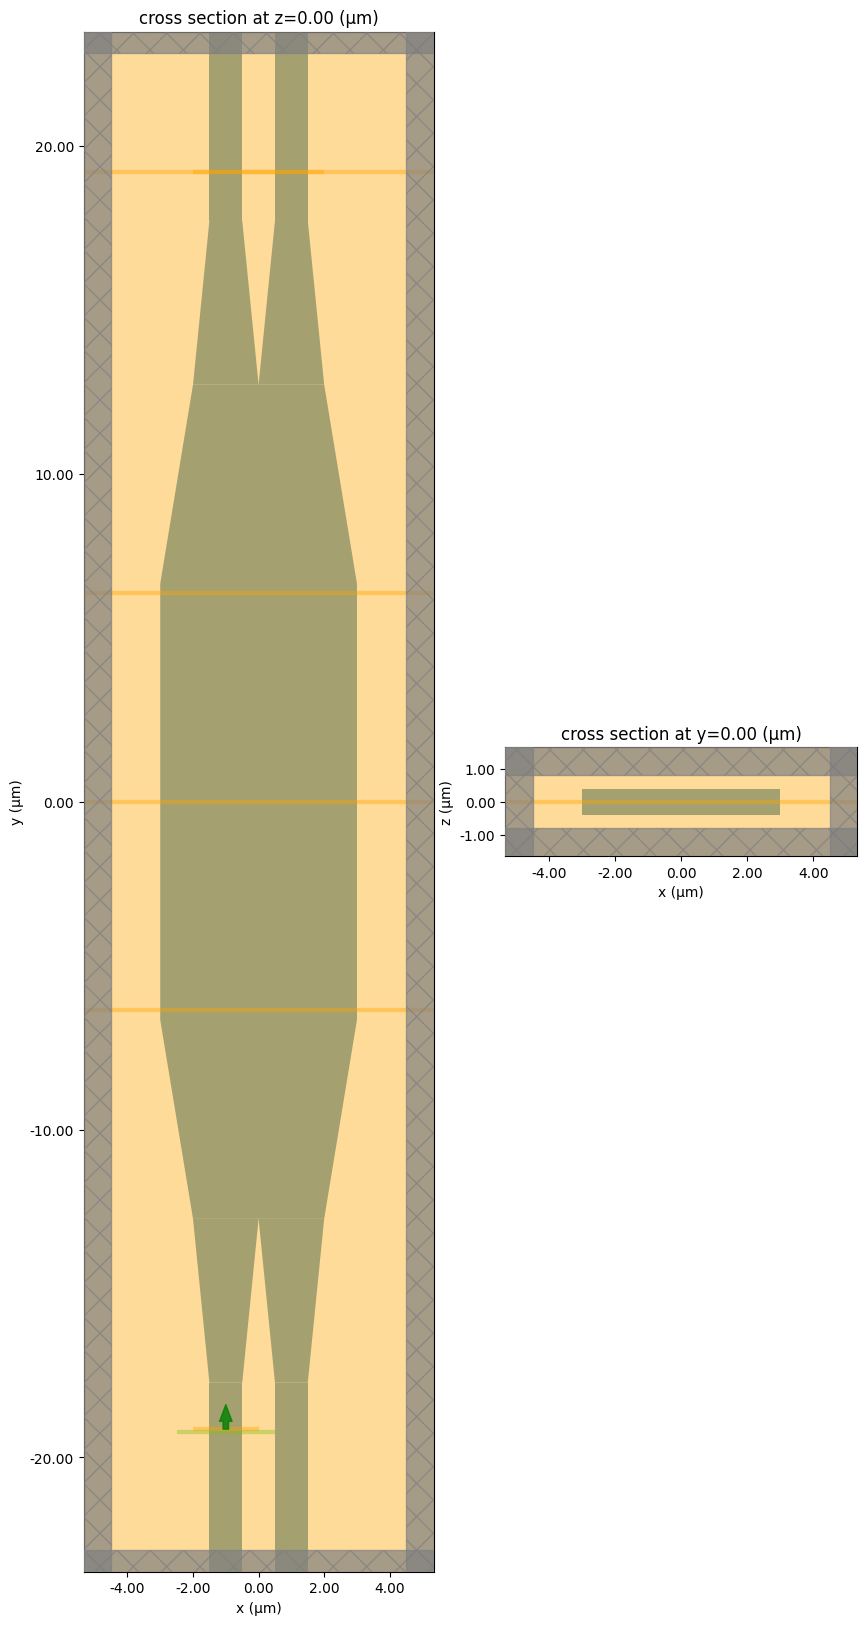

In [11]:

#creamos la estructura
Len_MMI = Len_MMI2 #longitud del MMI optimizada

MMI_body = td.Structure(
    geometry = create_ridge2(MMI_width,0,-Len_MMI/2,Len_MMI/2,-wg_array_thickness/2,wg_array_thickness/2,0,len_corner2),
    medium = sin,)

Wg_in0 = td.Structure(
    geometry = create_ridge(wg_array_width,-gap/2,-(Len_MMI/2+taper_length+wvg_length),-(Len_MMI/2+taper_length),-wg_array_thickness/2,wg_array_thickness/2,0),
    medium = sin,
)
Taper_in0 = td.Structure(
    geometry = create_taper(MMI_width/3,-gap/2,-(Len_MMI/2+taper_length),-(Len_MMI/2),-wg_array_thickness/2,wg_array_thickness/2,0,wg_array_width),
    medium = sin,
)

Wg_in1 = td.Structure(
    geometry = create_ridge(wg_array_width,gap/2,-(Len_MMI/2+taper_length+wvg_length),-(Len_MMI/2+taper_length),-wg_array_thickness/2,wg_array_thickness/2,0),
    medium = sin,
)
Taper_in1 = td.Structure(
    geometry = create_taper(MMI_width/3,gap/2,-(Len_MMI/2+taper_length),-(Len_MMI/2),-wg_array_thickness/2,wg_array_thickness/2,0,wg_array_width),
    medium = sin,
)

Wg_out0 = td.Structure(
    geometry = create_ridge(wg_array_width,-gap/2,(Len_MMI/2+taper_length),(Len_MMI/2+taper_length+wvg_length),-wg_array_thickness/2,wg_array_thickness/2,0),
    medium = sin,
)
Taper_out0 = td.Structure(
    geometry = create_taper(MMI_width/3,-gap/2,(Len_MMI/2+taper_length),(Len_MMI/2),-wg_array_thickness/2,wg_array_thickness/2,0,wg_array_width),
    medium = sin,
)

Wg_out1 = td.Structure(
    geometry = create_ridge(wg_array_width,gap/2,(Len_MMI/2+taper_length),(Len_MMI/2+taper_length+wvg_length),-wg_array_thickness/2,wg_array_thickness/2,0),
    medium = sin,
)
Taper_out1 = td.Structure(
    geometry = create_taper(MMI_width/3,gap/2,(Len_MMI/2+taper_length),(Len_MMI/2),-wg_array_thickness/2,wg_array_thickness/2,0,wg_array_width),
    medium = sin,
)

####

#definimos los monitores y fuentes

mode_spec = td.ModeSpec(
    num_modes=2,
    target_neff=3,
    track_freq="central",
    precision= "double",
    group_index_step=True
)
mode_source = td.ModeSource(
    center = (-gap/2,-(Len_MMI/2+taper_length+1.5),0),
    size = (3 * wg_array_width,0 , 5*wg_array_thickness),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth),
    direction = "+",
    mode_spec = mode_spec,
    mode_index=0,
    num_freqs=5,
)
field_monitor1 = td.FieldMonitor(
    center = (0,0,0), size = (td.inf,td.inf,0), freqs=[freq0], name = "field1"
)
field_monitor11 = td.FieldMonitor(
    center = (0,0,wg_array_thickness/2), size = (td.inf,td.inf,0), freqs=[freq0], name = "field11"
)
field_monitor2 = td.FieldMonitor(
    center = (0,0,0), size = (td.inf,0,td.inf), freqs=[freq0], name = "field2"
)
field_monitor3 = td.FieldMonitor(
    center = (0,Len_MMI/4,0), size = (td.inf,0,td.inf), freqs=[freq0], name = "field3"
)
field_monitor4 = td.FieldMonitor(
    center = (0,-Len_MMI/4,0), size = (td.inf,0,td.inf), freqs=[freq0], name = "field4"
)

field_monitor5 = td.FieldMonitor(
    center = (0,(Len_MMI/2+taper_length+1.5),0), size = (td.inf,0,td.inf), freqs=[freq0], name = "field5"
)



flux_monitor0 = td.FluxMonitor(
    center = (-gap/2,-(Len_MMI/2+taper_length+1.4),0),
    size = (2 * wg_array_width,0,5*wg_array_thickness),
    freqs = freqs,
    name = "flux0",
)


flux_monitor1 = td.FluxMonitor(
    center = (-gap/2,(Len_MMI/2+taper_length+1.5),0),
    size = (2 * wg_array_width,0,5*wg_array_thickness),
    freqs = freqs,
    name = "flux1",
)

mode_monitor1 = td.ModeMonitor(
    center = (-gap/2, (Len_MMI/2+taper_length+3/2),0),
    size = (2 * wg_array_width,0 , 5*wg_array_thickness),
    freqs= freqs,
    mode_spec = td.ModeSpec(num_modes=1,target_neff=3),
    name = "mode1",

)

flux_monitor2 = td.FluxMonitor(
    center = (gap/2,(Len_MMI/2+taper_length+1.5),0),
    size = (2 * wg_array_width,0,5*wg_array_thickness),
    freqs = freqs,
    name = "flux2",
)

mode_monitor2 = td.ModeMonitor( 
    center = (gap/2, (Len_MMI/2+taper_length+3/2),0),
    size = (2 * wg_array_width,0 , 5*wg_array_thickness),
    freqs= freqs,
    mode_spec = td.ModeSpec(num_modes=1,target_neff=3),
    name = "mode2",
)
flux_monitor00 = td.FluxMonitor(
    center = (-gap/2,-(Len_MMI/2),0),
    size = (2 * wg_array_width,0,5*wg_array_thickness),
    freqs = freqs,
    name = "flux00",
)

mode_monitor00 = td.ModeMonitor(
    center = (-gap/2, -(Len_MMI/2),0),
    size = (2 * wg_array_width,0 , 5*wg_array_thickness),
    freqs= freqs,
    mode_spec = td.ModeSpec(num_modes=1,target_neff=3),
    name = "mode00",

)

flux_monitor11 = td.FluxMonitor(
    center = (-gap/2,(Len_MMI/2),0),
    size = (2 * wg_array_width,0,5*wg_array_thickness),
    freqs = freqs,
    name = "flux11",
)

mode_monitor11 = td.ModeMonitor(
    center = (-gap/2, (Len_MMI/2),0),
    size = (2 * wg_array_width,0 , 5*wg_array_thickness),
    freqs= freqs,
    mode_spec = td.ModeSpec(num_modes=1,target_neff=3),
    name = "mode11",

)

flux_monitor22 = td.FluxMonitor(
    center = (gap/2,(Len_MMI/2),0),
    size = (2 * wg_array_width,0,5*wg_array_thickness),
    freqs = freqs,
    name = "flux22",
)

mode_monitor22 = td.ModeMonitor( 
    center = (gap/2, (Len_MMI/2),0),
    size = (2 * wg_array_width,0 , 5*wg_array_thickness),
    freqs= freqs,
    mode_spec = td.ModeSpec(num_modes=1,target_neff=3),
    name = "mode22",
)

Lx = 1.5*MMI_width 
Ly= 1.5*(Len_MMI+taper_length) 
Lz = 2*wg_array_thickness
grid_spec = td.GridSpec.auto(min_steps_per_wvl=15,wavelength=1.55)
sim = td.Simulation(
    size = (Lx,Ly,Lz),
    grid_spec = grid_spec,
    run_time = 3e-12,
    boundary_spec= td.BoundarySpec.all_sides(boundary = td.PML()),
    medium=sio2,
    structures=(MMI_body,Wg_in0,Taper_in0,Wg_in1,Taper_in1,Wg_out0,Taper_out0,Wg_out1,Taper_out1),
    sources=[mode_source],
    monitors = [field_monitor1,field_monitor2,field_monitor3,field_monitor4,field_monitor5,flux_monitor0,flux_monitor1,flux_monitor2]#,mode_monitor1,mode_monitor2,flux_monitor00,flux_monitor11,flux_monitor22,mode_monitor00,mode_monitor11,mode_monitor22],
)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
ax1 = sim.plot(z=0, ax=ax1)
ax2 = sim.plot(y=0, ax=ax2)
plt.show()

sim.plot_3d()


In [13]:
reference_point = (0,0)
waveguide_point = (0,0)
other_point = (0,(Len_MMI/2+taper_length+1.5))

spectrum = wvlenth[::10]

waveguide_medium = approximate_material(sim, waveguide_point, reference_point, spectrum)
background_medium = approximate_material(sim, other_point, reference_point, spectrum)

sim_2D = create_2D_sim(sim, [waveguide_medium, background_medium])
sim_2D.plot_eps(z=0,freq=freq0)
plt.show()

13:42:59 CEST WARNING: 'simulation.structures[1]' is outside of the simulation  
              domain.                                                           

              WARNING: Suppressed 3 WARNING messages.                           

              WARNING: Structure at 'structures[2]' has bounds that extend      
              exactly to simulation edges. This can cause unexpected behavior.  
              If intending to extend the structure to infinity along one        
              dimension, use td.inf as a size variable instead to make this     
              explicit.                                                         

              WARNING: Suppressed 3 WARNING messages.                           

13:43:00 CEST Mode solver created with                                          
              task_id='fdve-00ddab98-ea94-4a6b-bfc9-6380980167d4',              
              solver_id='mo-11dd69f1-1b55-4e72-ba51-8cd249da162e'.

              WARNING: 'simulation.structures[1]' is outside of the simulation  
              domain.                                                           

              WARNING: Suppressed 3 WARNING messages.                           

              WARNING: Structure at 'structures[2]' has bounds that extend      
              exactly to simulation edges. This can cause unexpected behavior.  
              If intending to extend the structure to infinity along one        
              dimension, use td.inf as a size variable instead to make this     
              explicit.                                                         

              WARNING: Suppressed 3 WARNING messages.                           

Output()

Output()

13:43:04 CEST Mode solver status: queued

13:43:12 CEST Mode solver status: running

KeyboardInterrupt: 

In [18]:
job = web.Job(simulation=sim_2D, task_name="MMI_2D", verbose=True)
estimated_cost = web.estimate_cost(job.task_id)
print(f'The estimated maximum cost is {estimated_cost:.3f} Flex Credits.')

19:13:22 CEST Created task 'MMI_2D' with task_id                                
              'fdve-36500160-a3ab-43a9-8e97-dafde5328b20' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=387134;https://tidy3d.simulation.cloud/workbench?taskId=fdve-36500160-a3ab-43a9-8e97-dafde5328b20\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=604521;https://tidy3d.simulation.cloud/workbench?taskId=fdve-36500160-a3ab-43a9-8e97-dafde5328b20\taskId]8;;\]8;id=387134;https://tidy3d.simulation.cloud/workbench?taskId=fdve-36500160-a3ab-43a9-8e97-dafde5328b20\=]8;;\]8;id=808332;https://tidy3d.simulation.cloud/workbench?taskId=fdve-36500160-a3ab-43a9-8e97-dafde5328b20\fdve]8;;\]8;id=387134;https://tidy3d.simulation.cloud/workbench?taskId=fdve-36500160-a3ab-43a9-8e97-dafde5328b20\-36500160-a3]8;;\
              ]8;id=387134;https://tidy3d.simulation.cloud/workbench?taskId=fdve-36500160-a3ab-43a9-8e97-dafde5328b20\ab-43a9-8e97-dafde5328b20']8;;\.

              Task folder: ]8;id=685455;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

19:13:24 CEST Maximum FlexCredit cost: 0.025. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

19:13:25 CEST Maximum FlexCredit cost: 0.025. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

The estimated maximum cost is 0.025 Flex Credits.


In [19]:
sim_data = job.run(path="data/MMI_2D.hdf5")


19:13:26 CEST status = queued

              To cancel the simulation, use 'web.abort(task_id)' or             
              'web.delete(task_id)' or abort/delete the task in the web UI.     
              Terminating the Python script will not stop the job running on the
              cloud.

Output()

19:13:30 CEST status = preprocess

19:13:35 CEST starting up solver

              running solver

Output()

19:13:38 CEST early shutoff detected at 28%, exiting.

19:13:39 CEST status = postprocess

Output()

19:13:41 CEST status = success

19:13:43 CEST View simulation result at                                         
              ]8;id=821450;https://tidy3d.simulation.cloud/workbench?taskId=fdve-36500160-a3ab-43a9-8e97-dafde5328b20\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=650147;https://tidy3d.simulation.cloud/workbench?taskId=fdve-36500160-a3ab-43a9-8e97-dafde5328b20\taskId]8;;\]8;id=821450;https://tidy3d.simulation.cloud/workbench?taskId=fdve-36500160-a3ab-43a9-8e97-dafde5328b20\=]8;;\]8;id=561179;https://tidy3d.simulation.cloud/workbench?taskId=fdve-36500160-a3ab-43a9-8e97-dafde5328b20\fdve]8;;\]8;id=821450;https://tidy3d.simulation.cloud/workbench?taskId=fdve-36500160-a3ab-43a9-8e97-dafde5328b20\-36500160-a3]8;;\
              ]8;id=821450;https://tidy3d.simulation.cloud/workbench?taskId=fdve-36500160-a3ab-43a9-8e97-dafde5328b20\ab-43a9-8e97-dafde5328b20']8;;\.

Output()

19:13:46 CEST loading simulation from data/MMI_2D.hdf5

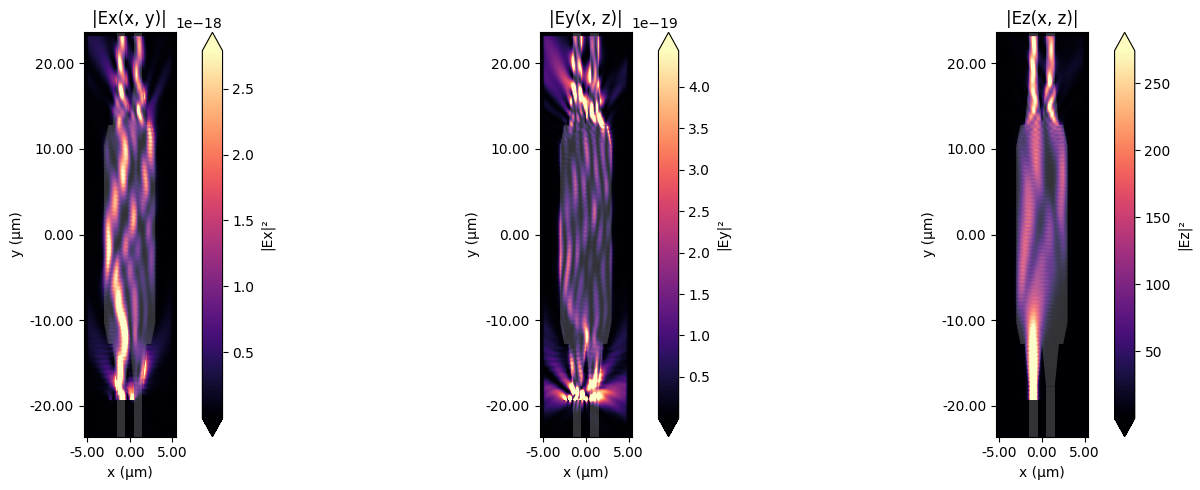

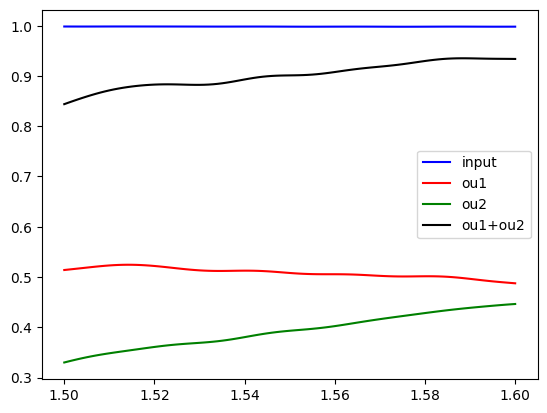

In [20]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 5))
sim_data.plot_field("field1", "Ex",val="abs^2", f=freq0, ax=ax1)
sim_data.plot_field("field1", "Ey",val="abs^2", f=freq0, ax=ax2)
sim_data.plot_field("field1", "Ez",val="abs^2", f=freq0, ax=ax3)
ax1.set_title("|Ex(x, y)|")
ax1.set_aspect("equal")
ax2.set_title("|Ey(x, z)|")
ax2.set_aspect("equal")
ax3.set_title("|Ez(x, z)|")
ax3.set_aspect("equal")
plt.show()

plt.figure()
#m0 = sim_data["mode00"].amps.sel(mode_index=0, direction="+").abs
#sim_data["mode1"].amps.sel(mode_index=0, direction="+").abs.plot(x="f")
#sim_data["mode2"].amps.sel(mode_index=0, direction="+").abs.plot(x="f")

#m1 = sim_data["mode1"].amps.sel(mode_index=0, direction="+").abs
#m2 = sim_data["mode2"].amps.sel(mode_index=0, direction="+").abs

#m11 = sim_data["mode11"].amps.sel(mode_index=0, direction="+").abs
#m22 = sim_data["mode22"].amps.sel(mode_index=0, direction="+").abs

T0_2d = sim_data["flux0"].flux
T1_2d = sim_data["flux1"].flux
T2_2d = sim_data["flux2"].flux


plt.plot(wvlenth, T0_2d, label="input",c = 'b')

plt.plot(wvlenth, T1_2d, label="ou1", c = 'r')
plt.plot(wvlenth, T2_2d, label="ou2", c = 'g')
plt.plot(wvlenth, T1_2d+T2_2d, label="ou1+ou2", c = 'k')
plt.legend()

#plt.plot(wvlenth, m1**2+m2**2, label="input", c = 'r')


plt.show()

In [12]:
job = web.Job(simulation=sim, task_name="MMI_2x2", verbose=True)
estimated_cost = web.estimate_cost(job.task_id)
print(f'The estimated maximum cost is {estimated_cost:.3f} Flex Credits.')

15:15:10 CEST Created task 'MMI_2x2' with task_id                               
              'fdve-daff6537-1351-49d9-a128-d4a69f72ea92' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=320082;https://tidy3d.simulation.cloud/workbench?taskId=fdve-daff6537-1351-49d9-a128-d4a69f72ea92\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=767986;https://tidy3d.simulation.cloud/workbench?taskId=fdve-daff6537-1351-49d9-a128-d4a69f72ea92\taskId]8;;\]8;id=320082;https://tidy3d.simulation.cloud/workbench?taskId=fdve-daff6537-1351-49d9-a128-d4a69f72ea92\=]8;;\]8;id=766870;https://tidy3d.simulation.cloud/workbench?taskId=fdve-daff6537-1351-49d9-a128-d4a69f72ea92\fdve]8;;\]8;id=320082;https://tidy3d.simulation.cloud/workbench?taskId=fdve-daff6537-1351-49d9-a128-d4a69f72ea92\-daff6537-13]8;;\
              ]8;id=320082;https://tidy3d.simulation.cloud/workbench?taskId=fdve-daff6537-1351-49d9-a128-d4a69f72ea92\51-49d9-a128-d4a69f72ea92']8;;\.

              Task folder: ]8;id=67631;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

15:15:12 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

15:15:13 CEST Maximum FlexCredit cost: 0.138. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

The estimated maximum cost is 0.138 Flex Credits.


In [13]:
sim_data = job.run(path="data/MMI_2x2.hdf5")

15:15:15 CEST status = success

Output()

15:15:17 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

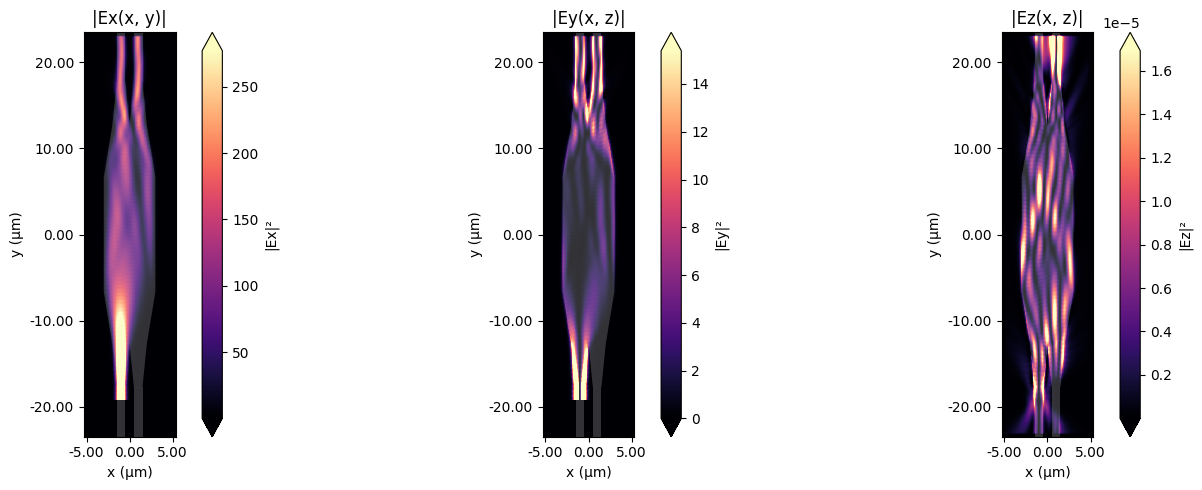

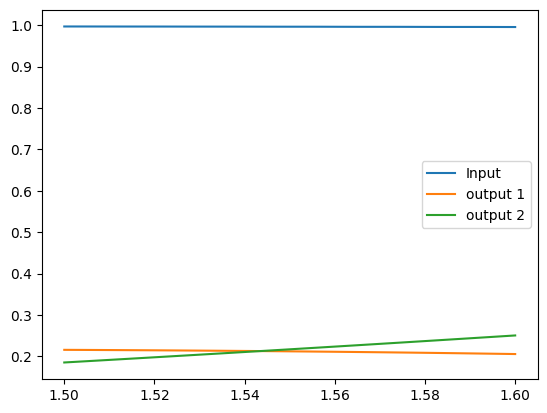

NameError: name 'T0_2d' is not defined

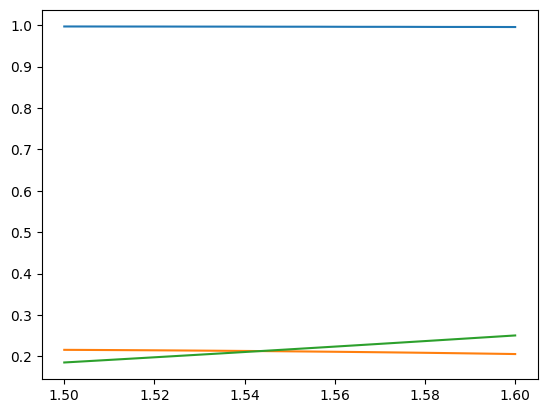

In [14]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(15, 5))
sim_data.plot_field("field1", "Ex",val="abs^2", f=freq0, ax=ax1)
sim_data.plot_field("field1", "Ey",val="abs^2", f=freq0, ax=ax2)
sim_data.plot_field("field1", "Ez",val="abs^2", f=freq0, ax=ax3)
ax1.set_title("|Ex(x, y)|")
ax1.set_aspect("equal")
ax2.set_title("|Ey(x, z)|")
ax2.set_aspect("equal")
ax3.set_title("|Ez(x, z)|")
ax3.set_aspect("equal")
plt.show()

#m0 = sim_data["mode00"].amps.sel(mode_index=0, direction="+").abs
#m1 = sim_data["mode1"].amps.sel(mode_index=0, direction="+").abs
#m2 = sim_data["mode2"].amps.sel(mode_index=0, direction="+").abs

#m11 = sim_data["mode11"].amps.sel(mode_index=0, direction="+").abs   
#m22 = sim_data["mode22"].amps.sel(mode_index=0, direction="+").abs
ldas = wvlenth * 1e6  # Convert to nm

T0 = sim_data["flux0"].flux
T1 = sim_data["flux1"].flux
T2 = sim_data["flux2"].flux

plt.plot(wvlenth, T0, label="Input")
plt.plot(wvlenth, T1, label="output 1")
plt.plot(wvlenth, T2, label="output 2")

plt.legend()
plt.show()

plt.plot(wvlenth, T0, label="Input")
plt.plot(wvlenth, T1, label="output 1")
plt.plot(wvlenth, T2, label="output 2")

plt.plot(wvlenth, T0_2d, label="Input 2d")
plt.plot(wvlenth, T1_2d, label="output 1, 2d")
plt.plot(wvlenth, T2_2d, label="output 2, 2d")
plt.legend()
plt.show()

plt.xlabel("Wavelength ")
plt.ylabel("Transmission to output waveguide")
plt.legend(("Output 0", "Output 1"))

plt.sca(ax2)
excess_loss = 10*np.log10((T1 + T2))
plt.plot(ldas, excess_loss)
plt.xlabel("Wavelength")
plt.ylabel("Excess loss (dB)")




In [24]:
par = create_3D_MMI_simulation(Len_MMI,MMI_width, wg_array_thickness, wg_array_width,wvg_length, gap, taper_length, freq0, fwidth, sin, sio2,freqs)


19:13:56 CEST WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              Created task 'MMI_2x2' with task_id                               
              'fdve-ae006636-4314-41a1-af7a-b9a58e25dee7' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=432094;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ae006636-4314-41a1-af7a-b9a58e25dee7\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=686083;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ae006636-4314-41a1-af7a-b9a58e25dee7\taskId]8;;\]8;id=432094;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ae006636-4314-41a1-af7a-b9a58e25dee7\=]8;;\]8;id=854427;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ae006636-4314-41a1-af7a-b9a58e25dee7\fdve]8;;\]8;id=432094;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ae006636-4314-41a1-af7a-b9a58e25dee7\-ae006636-43]8;;\
              ]8;id=432094;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ae006636-4314-41a1-af7a-b9a58e25dee7\14-41a1-af7a-b9a58e25dee7']8;;\.

              Task folder: ]8;id=299744;https://tidy3d.simulation.cloud/folders/folder-5c75483f-1275-4f77-a993-644506ee1773\'default']8;;\.

Output()

19:13:58 CEST Maximum FlexCredit cost: 0.139. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

19:13:59 CEST status = success

Output()

19:14:02 CEST loading simulation from data/MMI_2x2.hdf5

              WARNING: Structure at structures[0] was detected as being less    
              than half of a central wavelength from a PML on side z-min. To    
              avoid inaccurate results or divergence, please increase gap       
              between any structures and PML or fully extend structure through  
              the pml.                                                          

              WARNING: Suppressed 17 WARNING messages.                          

              WARNING: Warning messages were found in the solver log. For more  
              information, check 'SimulationData.log' or use                    
              'web.download_log(task_id)'.                                      

In [25]:
print(T1[5])

<xarray.FluxDataArray ()> Size: 4B
array(0.2130443, dtype=float32)
Coordinates:
    f        float64 8B 1.992e+14
Attributes:
    units:      W
    long_name:  flux


In [26]:
int(len(T1)/2)

50